In [1]:
import os
import numpy as np
import lxml
from lxml import objectify, etree, html
import json
import urllib3
from io import StringIO, BytesIO
import pandas as pd

import matplotlib.pyplot as plt
import re
import string
import pymorphy2
from scipy.sparse import *
#import enchant
import stop_words
from nltk.stem.snowball import RussianStemmer
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer

%matplotlib inline

# Parsing

## lxml

# Лабораторная №1. Сбор корпуса.

In [2]:
MURL = 'https://ria.ru'
pol_URL = 'https://ria.ru/politics'
corpus=[]
corpus_cat=[]
texts=[]

In [3]:
http = urllib3.PoolManager()
r = http.request('GET', pol_URL) # HTTPResponse (status, data, and header)
parser = etree.HTMLParser()
r.data.decode('utf8')
page = etree.parse(BytesIO(r.data), parser)
title = page.xpath("//div[@class='list-item']")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
#print(title)
title[0].getchildren()

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[<Element a at 0x9e5f4e0>,
 <Element div at 0x9e5f418>,
 <Element div at 0x9e5f328>]

In [4]:
some_title = page.xpath("//div[@class='list-item__title']")[0].text
print(some_title)
some_title = page.xpath("//div[@class='list-item__title']")[1].text
print(some_title)

Американист объяснил слова Помпео о "давлении" России на Украину 
Волгоградского депутата исключили из ЕР после слов о "тунеядцах и алкашах" 


In [5]:
a = []
some_title = page.xpath("//div[@class='list-item__title']")
smth = page.xpath("//a[@class='list-item__content']")
#for i in range(0,2):
for i in range(len(smth)):
    smth = page.xpath("//a[@class='list-item__content']")[i]
    a.append(smth.attrib['href'])
    #print(a[i])
    #URL2 = MURL + a
    #del myList[2]
    URL2 = a[i]
    #print(URL2)
    http = urllib3.PoolManager()
    r2 = http.request('GET', URL2) # HTTPResponse (status, data, and header)
    parser = etree.HTMLParser()
    r2.data.decode('utf8')
    page2 = etree.parse(BytesIO(r2.data), parser)

    title2 = page2.xpath("//div[@class='article__text']")
    #print(title2)
    pol_text = ' '
    for j in range(len(title2)):
        #for j in range(0,5):
        #text+= page.xpath("//div[@class='article__text']").text
        #print(title2[j].text)
        pol_text+=str(title2[j].text)
        pol_text+=' '
    corpus.append(pol_text)
    corpus_cat.append(0)
    texts.append(pol_text)
    print (URL2)
    print (i, ': ',pol_text)

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551755524.html
0 :   Госсекретарь США Майк Помпео обвинил Россию в политическом давлении на Украину через энергетику. "Россия использует трубопроводы для того, чтобы оказывать давление, политическое давление на Украину", – сказал Помпео, выступая с речью на конференции CERAWeek. Он также заявил, что Россия "вторглась на Украину, чтобы получить доступ к ее нефтяным и газовым резервам". "Она (Россия) решительно настроена помешать Украине использовать свои энергетические резервы и использовать свои трубопроводы и сети, чтобы приносить энергию в дома своих граждан", – считает госсекретарь. Россия ранее отвергала обвинения Запада во вмешательстве в дела Украины и заявляла, что заинтересована в разрешении внутриукраинского конфликта. Американист, профессор факультета права Высшей школы экономики (ВШЭ) Александр Домрин в эфире радио Sputnik прокомментировал заявление госсекретаря США.           


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551755143.html
1 :   None Как отмечается, за исключение Набиева члены ЕР проголосовали единогласно.  На прошлой неделе в соцсетях появилось  После высказывания областного депутата секретарь Волгоградского регионального отделения "Единой России" Сергей Горняков от имени партии принес извинения за слова чиновника.  Двенадцатого марта комиссия по этике ЕР рекомендовала исключить Набиева из партии. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551754185.html
2 :   США не хотят, чтобы их союзники зависели от российского газа, и сами не хотят зависеть от нефти из Венесуэлы, заявил американский госсекретарь Майк Помпео. "Мы не хотим, чтобы европейские коллеги были привязаны к российскому газу через проект "Северный поток-2", точно так же как мы не хотим, чтобы мы сами зависели от венесуэльских поставок нефти", – сказал он. США активно выступают против проекта "Северный поток-2", который предполагает строительство двух ниток газопровода общей мощностью 55 млрд кубометров газа в год от побережья России через Балтийское море до Германии. Помимо США, активно продвигающих в ЕС свой сжиженный природный газ (СПГ), против строительства "Северного потока-2" выступает Украина, а также Польша, Литва и Латвия, которые считают этот проект политическим.  Эксперт в области энергетики, обозреватель газеты "Известия" Николай Хренков в эфире радио Sputnik прокомментировал заявление Помпео, отметив, что никакой зависимост

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551753847.html
3 :   Палата представителей конгресса США одобрила законопроект, который запрещает Белому дому признавать российский суверенитет над Крымом, сообщается в твиттере пресс-офиса палаты. Отмечается, что палата одобрила "Законопроект о непризнании присоединения Крыма" 427 голосами за, против проголосовал только один конгрессмен. Ранее комитет палаты представителей по иностранным делам единогласно одобрил законопроект, запрещающий Белому дому признавать Крым частью России. Согласно тексту документа, Вашингтон "не признает де-юре или де-факто" российский суверенитет над Крымом, а также над воздушным пространством и территориальными водами полуострова. При этом в тексте содержится исключение для президента: он сможет нарушить данное правило, если это будет отвечать "интересам национальной безопасности". Если законопроект одобрят обе палаты конгресса США, документ направят на подпись главе государства. Политолог, заместитель председателя Общественной пала

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551753591.html
4 :   None Ранее в столице был принят закон, предусматривающий сокращение членов Общественной палаты с 64 до 45 в 2019 году. Согласно закону, по 15 членов ОП будут избираться тремя органами: мэром по представлению зарегистрированных общественных объединений, Мосгордумой и самой Общественной палатой. "Настоящим постановлением предлагается утвердить рекомендованных профильной комиссией лиц. Выдвинутые кандидаты соответствуют требованием закона об Общественной палате Москвы", - сказал председатель комиссии по кадровым вопросам в рамках компетенции Мосгордумы Виктор Кругляков в ходе заседания. Так, членами палаты нового созыва стали председатель регионального отделения общероссийской общественной организации "Объединение мотоциклистов России Мото-Справедливость" в Москве Максим Буре, президент общероссийской общественной организации "Российская ассоциация политической науки" Оксана Гаман-Голутвина, член общественного совета департамента природопользо

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551752519.html
5 :   None "Будет совещание с постоянными членами Совбеза и много-много разных встреч, в том числе по отдельности встреча с участниками совещания с постоянными членами Совбеза и иные совещания", - сказал Песков журналистам. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551752413.html
6 :   None "Завтра будет посвящена работа съезду РСПП, Путин примет участие в пленарном заседании. Потом он выступит, послушает выступление некоторых участников, небольшая дискуссия и затем традиционно в закрытом режиме проведет встречу с членами бюро РСПП", - сказал Песков журналистам. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551750213.html
7 :   None Ранее Владимир Путин в послании Федеральному Собранию обращался к Банку России и правоохранительным органам с просьбой в кратчайшие сроки навести порядок на рынке микрокредитования, чтобы защитить людей от мошенничества и вымогательства со стороны недобросовестных кредиторов. "Мониторинг проходил выборочно в 40 регионах страны. Мы зафиксировали 16 организаций, осуществлявших деятельность без лицензии, 91 микрофинансовая организация располагалась на территории объектов нестационарной торговли и 20 случаев, когда МФО не заключали соглашения об использовании персональных данных при заключении договора. Если человек решил обратиться за финансовыми услугами в подобную организацию, он должен быть уверен в том, что она работает по закону, с лицензией и в положенном месте. Поэтому по всем выявленным случаям нарушений мы подготовили и направили обращения в прокуратуры субъектов. Нельзя допустить, чтобы МФО обходили закон и обманывали людей", - 

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551749052.html
8 :   None Палата представителей конгресса США во вторник одобрила законопроект, который запрещает Белому дому призвать "де-юре или де-факто" российский суверенитет над Крымом, а также над воздушным пространством или территориальными водами полуострова. При этом в тексте содержится исключение для президента: он сможет нарушить это правило, если это будет отвечать "интересам национальной безопасности". Законопроект поддержало 427 членов палаты, против проголосовал только один. "Такое единогласное одобрение законопроекта, запрещающего Белому дому признавать Крым частью России, является ожидаемым и в какой-то части демонстрирует страх и бессилие американских властей перед собственным же народом – американцами, приезжающими на полуостров и все чаще высказывающими свое восхищение крымчанами, сумевшими отстоять и защитить свою Родину в соответствии с международным законодательством, реализовав неотъемлемое право на самоопределение", - сказала РИА Новос

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551747711.html
9 :   None Накануне его кандидатура была поддержана профильными комитетами палаты - по конституционному законодательству и по обороне и безопасности. Кандидатура Захарова была внесена в Совфед в конце прошлой недели. Захаров - государственный советник юстиции второго класса, на руководящих должностях в органах прокуратуры работает 20 лет, в должности прокурора Московской области - с октября 2013 года. Как сообщил во вторник РИА Новости замгенпрокурора Юрий Пономарев, в случае назначения Захаров будет курировать Северо-Западный федеральный округ. В генпрокуратуре сейчас вакантны две должности замгенпрокурора, одна из них освободилась после гибели Саака Карапетяна в октябре 2018 года. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551746688.html
10 :   Президент Венесуэлы Николас Мадуро сообщил, что намерен попросить власти России, Китая, Ирана и Кубы, а также ООН оказать поддержу в расследовании недавней атаки на энергосистему страны, которая привела к отключению на несколько дней электричества на большей части ее территории. "Я назначил специальную комиссию по расследованию кибератаки и попросил о сотрудничестве международных экспертов. Я намерен попросить о поддержке ООН, Иран, Китай, Россию и Кубу", - сказал Мадуро и добавил, что у этих стран "большой опыт в вопросе защиты от кибератак". Трансляция выступления венесуэльского лидера велась в его аккаунте в  По словам Мадуро, спустя пять дней после общенационального отключения электричества властям удалось устранить последствия атаки, которая "была совершена с территории Соединенных Штатов". "Могу подтвердить, что победа уже в наших руках – победа в деле восстановления электросистемы Венесуэлы", – заверил президент. Главный редактор жу

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551745928.html
11 :   Палата представителей конгресса США во вторник приняла очередные два законопроекта, направленные на противодействие России. В ходе голосования законодатели поддержали так называемый KREMLIN Act  – законопроект, обязывающий разведку страны подготовить доклад о "намерениях российского руководства", а также закон "Об открытости Владимира Путина", который нацелен на борьбу с коррупцией в России путем обнародования информации об этом. Оба документа содержат примерно одинаковый набор традиционных обвинений в адрес России и ее руководства, начиная от "аннексии Крыма" и заканчивая вмешательством в выборы в США и в целом "российской агрессии" и угрозе Западу. Первый документ требует от директора национальной разведки США в течение 90 дней подготовить доклад о намерениях России в области потенциальных военных действий против членов НАТО, а также о возможном ответе России на усиление военного присутствия США и их союзников в Восточной Европе, включая

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551745492.html
12 :   Британский парламент повторно отверг соглашение с Евросоюзом по Brexit. Против документа высказался 391 парламентарий, за – 242. Теперь им предстоит голосование по вопросу о выходе из ЕС без соглашения. Премьер-министр Тереза Мэй заявила, что перенос срока Brexit не решает проблему. В январе парламент уже отверг предложенный правительством документ подавляющим большинством голосов, потребовав внесения изменений в часть, касающуюся договоренностей по ирландской границе. Совет ЕС разочарован голосованием парламента Великобритании по договору о Brexit и не знает, что еще может сделать Евросоюз, чтобы способствовать ратификации договора Лондоном, сказал РИА Новости пресс-секретарь главы Евросовета. Как сообщили РИА Новости в пресс-службе Еврокомиссии, шансы "жесткого" отделения Великобритании от Евросоюза или даже отсутствия Brexit возросли на фоне голосования в парламенте Британии. Отмечается, что Евросоюз со своей стороны продолжит подготовк

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551742581.html
13 :   None Палата представителей конгресса США во вторник одобрила законопроект, который запрещает Белому дому признавать "де-юре или де-факто" российский суверенитет над Крымом, а также над воздушным пространством или территориальными водами полуострова. При этом в тексте содержится исключение для президента: он сможет нарушить это правило, если это будет отвечать "интересам национальной безопасности". Законопроект поддержали 427 членов палаты, против проголосовал только один. "Одобрение палатой представителей конгресса США законопроекта, запрещающего Соединённым Штатам признавать Крым российским, разумеется, не будет иметь последствий ни для реального статуса Крыма, ни для международной обстановки вокруг него", - написал Косачев в Facebook. По мнению сенатора, законодатели США такой цели и не преследовали, а большинство американских законопроектов по России принимается "исключительно для внутреннего пользования". Косачев полагает, что такой ша

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551742449.html
14 :   Президент Украины Петр Порошенко в 2014 году хотел получить членство в Евросоюзе и НАТО в обмен на Крым, заявил бывший президент Грузии и бывший губернатор Одесской области Михаил Саакашвили. "У меня был разговор с Порошенко, и он мне сказал: ты ж практически свыкся с идеей, что Южная Осетия и Абхазия никогда не вернутся в Грузию. Точно так же мы должны свыкнуться с идеей, что Крыма уже у Украины не будет, но зато мы это поменяем на членство в Евросоюзе и НАТО", – сказал Саакашвили в интервью Дмитрию Гордону. Видео  Саакашвили выразил уверенность, что потеря Крыма может привести к тому, что Украина не вступит ни в ЕС, ни в НАТО, "потому что появляется территориальный конфликт". Политолог, экономист Александр Дудчак в эфире радио Sputnik прокомментировал заявление Михаила Саакашвили.  По его мнению, силы, пришедшие к власти в Киеве после госпереворота 2014 года, по сути, вынудили Крым вернуться в Россию.  Крым вновь стал российским регионом

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551742178.html
15 :   None Палата представителей конгресса США во вторник одобрила законопроект, который запрещает Белому дому призвать "де-юре или де-факто" российский суверенитет над Крымом, а также над воздушным пространством или территориальными водами полуострова. При этом в тексте содержится исключение для президента: он сможет нарушить это правило, если это будет отвечать "интересам национальной безопасности". Законопроект поддержали 427 членов палаты, против проголосовал только один. "Крым воссоединился с Россией конституционным путем, не противоречащим международному праву и уставу ООН. Крым – это территория мира и безопасности, поэтому не представляет опасность ни кому, тем паче США, поэтому не надо смешить мир", - сказал Шонус. По его словам, вопрос российского статуса Крыма закрыт и обсуждению не подлежит. "Крымчане это подтвердили и на референдуме, и во время блэкаута, когда отказались идти на уступки Киеву взамен на электричество, и на выборах в Г

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551734727.html
16 :   None В распоряжении газеты The Wall Street Journal оказалось письмо посла США в Германии Ричарда Гренелла, адресованное министру экономики ФРГ Петеру Альтмайеру. Среди прочего дипломат подчеркивает, что для сотрудничества в сфере разведки важную роль играют безопасные системы коммуникации, а такие компании, как китайская Huawei, "могут представлять угрозу конфиденциальности" контактов между союзниками. Полностью прекращать обмен разведданными американцы не собираются, но уровень взаимодействия может снизиться. Как пояснили изданию немецкие чиновники, Берлин это опечалило, поскольку для Германии, как и всего Евросоюза, оперативная информация из США представляет особую ценность для борьбы с терроризмом.  Китайская корпорация Huawei Technologies столкнулась с проблемами несколько месяцев назад. В конце января Минюст США предъявил официальные обвинения и компании, и ее финансовому директору Мэн Ваньчжоу, задержанной в декабре. Речь идет о пром

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551626859.html
17 :   None Тринадцатого марта 1852 года нью-йоркская газета NY Lantern weekly опубликовала первое изображение дядюшки Сэма. Обычно этот оживший, если так можно сказать, образ Соединенных Штатов изображают в виде высокого человека уже в возрасте, седого, с резкими чертами лица, старомодной бородкой, в цилиндре цветов американского флага, во фраке и полосатых брюках. Такой ставший традиционным образ дядюшки Сэма впервые нарисовал художник Томас Наст. Он же, кстати, первым ввел изображение слона как символа Республиканской партии и сделал популярным осла Демократической партии. А сам по себе дядюшка Сэм появился во время британо-американской войны 1812 года. Говорят, что Дядя Сэм – это мясник Сэмюэль Уилсон, поставщик провизии в американскую армию. Он маркировал бочки с мясом буквами U.S., то есть United States. Солдаты же в шутку говорили, что мясо прибыло от Дяди Сэма – Uncle Sam, опять же, сокращенно – U.S.  А еще говорят, что все началось со ст

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190312/1551736132.html
18 :   Вена разочарована решением Украины не допускать российских наблюдателей на президентские выборы, заявила глава МИД Австрии Карин Кнайсль. "Мы выразили разочарование решением украинских властей не допустить наблюдателей с российской стороны в рамках БДИПЧ (Бюро по демократическим институтам и правам человека) на выборы ", – сказала Кнайсль на пресс-конференции по итогам переговоров со своим российским коллегой Сергеем Лавровым. "Однако в рамках БДИПЧ будет проходить присутствие наблюдателей, и БДИПЧ это важный, центральный элемент ОБСЕ", – добавила министр. Политолог Иван Мезюхо считает, что эти заявления могут говорить о кризисе отношений между ЕС и Украиной. Своим мнением он поделился в эфире радио Sputnik. Верховная рада Украины ранее приняла закон, запрещающий представителям России работать в качестве наблюдателей на президентских выборах на Украине, которые пройдут 31 марта.  Директор БДИПЧ ОБСЕ Ингибьерг Сольрун Гисладоттир заявила, ч

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190312/1551735342.html
19 :   Министр иностранных дел Украины Павел Климкин прокомментировал ноту, направленную Москвой Киеву из-за нарушения договора о дружбе. По его мнению, в документе говорится о том, что "только сама Украина систематически нарушала договор".  "Например, соглашение об ассоциации с ЕС – это, по их убеждению, тоже грубое нарушение. Как и все, что мы делаем, чтобы быть более демократическими, европейскими и, в конце концов, по-настоящему независимыми", – написал Климкин  По его словам, позиция России говорит о том, что Украина "все делает правильно". Ранее МИД РФ направил Украине ноту, в которой заявил о нарушениях договора о дружбе. Речь идет, в частности, о том, что Украина ратифицировала меморандум по поддержке операций НАТО и назвала вступление в альянс стратегической целью, хотя это противоречит шестой статье, по которой Москва и Киев обязуются не заключать с третьими странами каких-либо договоров, направленных против другой стороны.  Кроме того,

In [6]:
eco_URL = 'https://ria.ru/economy'
http = urllib3.PoolManager()
r = http.request('GET', eco_URL) # HTTPResponse (status, data, and header)
parser = etree.HTMLParser()
r.data.decode('utf8')
page = etree.parse(BytesIO(r.data), parser)
title = page.xpath("//div[@class='list-item']")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
#print(title)
title[0].getchildren()

a = []
some_title = page.xpath("//div[@class='list-item__title']")
smth = page.xpath("//a[@class='list-item__content']")
#for i in range(0,2):
for i in range(len(smth)):
    smth = page.xpath("//a[@class='list-item__content']")[i]
    a.append(smth.attrib['href'])
    #print(a[i])
    URL2 =  a[i]
    #print(URL2)
    http = urllib3.PoolManager()
    r2 = http.request('GET', URL2) # HTTPResponse (status, data, and header)
    parser = etree.HTMLParser()
    r2.data.decode('utf8')
    page2 = etree.parse(BytesIO(r2.data), parser)

    title2 = page2.xpath("//div[@class='article__text']")
    #print(title2)
    eco_text = ' '
    for j in range(len(title2)):
        #for j in range(0,5):
        #text+= page.xpath("//div[@class='article__text']").text
        #print(title2[j].text)
        eco_text+=str(title2[j].text)
        eco_text+=' '
    corpus.append(eco_text)
    corpus_cat.append(1)
    texts.append(eco_text)
    print (URL2)
    print (i, ': ',eco_text)
#print(eco_text)

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551756328.html
0 :   None Стоимость бивалютной корзины (0,55 доллара и 0,45 евро), рассчитанная по официальным курсам на четверг, уменьшилась по сравнению с показателем на среду на 11,8 копейки, составив 69,384615 рубля. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551755786.html
1 :   None В конце февраля  "ФАС провела проверку информации по материалам СМИ о росте цен на авиабилеты в первые месяцы 2019 года. В среднем за этот период рост цен не превышает 5%", - сообщили в ведомстве, отметив, что мониторинг цен на внутренних маршрутах будет продолжен. По данным службы, основная причина роста –  увеличение топливного сбора и сокращение предложений авиабилетов по льготным ценам и промоакциям. ФАС отмечает, что доля продаж авиабилетов через агентства-агрегаторы не превышает 30%, а основным каналом продаж услуг авиакомпаний остаются их собственные интернет-сайты и офисы. "По информации агентств-агрегаторов, в сообщениях прессы указывался рост стоимости "среднего чека", а не цен на авиабилеты. На показатель "среднего чека" влияют также: количество пассажиров в заказе, дальность перелета, наличие обратного билета, дополнительные услуги (бронирование отелей, аренда авто, трансферы). Таким образом, рост показателя "средний чек" г

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551754475.html
2 :   None По данным Росстата, инфляция в РФ в феврале в месячном выражении составила 0,4%, годовая ускорилась до 5,2%. "В феврале 2019 года темп роста цен вернулся к уровням прошлого года, что свидетельствует об исчерпании эффекта на цены от повышения НДС", - говорится в обзоре МЭР. "Совокупный дополнительный вклад увеличения базовой ставки НДС в годовые темпы инфляции оценивается на уровне 0,8–0,9 п.п., что меньше предварительных оценок Минэкономразвития России", - отметили также в министерстве. Основная ставка НДС в России с 1 января 2019 года выросла с 18% до 20%. В МЭР сообщили, что исчерпание эффекта повышения НДС привело к замедлению роста цен на непродовольственные товары за исключением подакцизной продукции примерно вдвое – до 0,31% месяц к месяцу в феврале с 0,58% в январе. "Наиболее заметное снижение темпов роста цен наблюдалось в сегменте товаров длительного пользования (легковые автомобили, средства связи, телерадиотовары). Сдерживаю

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551755266.html
3 :   None Заместитель председателя правительства в среду сказал журналистам, что необходимо внести изменения в нормативно-правовую базу, согласно которым социальные учреждения, прежде всего - школы, детские сады, больницы, могут получить право подтверждения лабораторным способом качества поставляемого продовольствия. "Это должна быть и обязанность поставщика и, соответственно, право заказчика проводить такие проверки с помощью испытаний в тех или иных сертифицированных лабораторий. И это должно быть основным элементом соответствующих контрактов на поставку продовольствия", - добавил Гордеев. Он отметил, что в ряде регионах, например, в Башкирии, обязанность проводить лабораторные проверки продуктов ввели в уставы бюджетных учреждений. "Но мы считаем, что лучше все-таки это закрепить (законодательно - ред.). Постараемся сделать это быстро, с учетом того, что тема актуальная. В этом году", - отметил вице-премьер. В конце февраля Гордеев по итогам 

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551754834.html
4 :   Более 14 миллионов человек воспользовались электронной подписью для получения посылок на "Почте России" за последние полгода. Благодаря этому время выдачи сократилось в пять раз, а время ожидания в очереди снизилось в среднем с 11 до 5 минут. Задача "Почты России" – перейти к цифровой модели, модернизировать линейки услуг и сделать их более востребованными потребителями. Об этом в интервью радио Sputnik в рамках ежегодной Недели российского бизнеса рассказал генеральный директор ФГУП "Почта России" Николай Подгузов. Должны меняться и физические отделения почты, процессы внутри, оперативное управление, рассказал Николай Подгузов. В 2018 году, по его словам, уже были отремонтированы 3 тысячи отделений почтовой связи, оснащены средствами доступа людей с ограниченными возможностями.  Он отметил, что в отделениях почты наиболее качественно должны оказываться именно базовые почтовые услуги. Вместе с тем, по словам Николая Подгузова, функционал от

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551754237.html
5 :   None На совещании с вице-премьерами глава правительства напомнил, что в майском указе президента был установлен ряд целей по ускорению темпов экономического роста, а также расширению несырьевого экспорта и вхождению российской экономики в пятерку крупнейших в мире. Он подчеркнул, что одним из шагов, направленных для достижения этих целей, является развитие нефтегазохимического комплекса. "Я подписал распоряжение правительства, которым утверждается план мероприятий по его развитию до 2025 года. Отрасль действительно важнейшая, она может дать существенный мультипликативный эффект для всей экономики, подтянуть за собой рост в ряде других отраслей, которые перерабатывают и вырабатывают синтетическую продукцию",- заявил Медведев. Глава кабмина сообщил, что план содержит определенные мероприятия и в итоге правительство рассчитывает удвоить объем производства крупнотоннажных полимеров, из которых делаются различные трубы и различные изделия, испол

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551752002.html
6 :   None Как пояснил в суде представитель истца, "дочка" Walt Disney потребовала от ответчика погасить задолженность по выплате вознаграждения в рамках лицензионного договора, а также неустойку. По словам истца, предметом лицензионного соглашения является "множество единиц контента - мультфильмы и фильмы". "Это крупная библиотека произведений, которые ответчик вправе показывать на своем ресурсе - онлайн-кинотеатре", - сказал представитель Walt Disney. Он также отметил, что за использование произведений предусматривалось вознаграждение, включающее минимальную фиксированную сумму и сумму, зависящую от количества просмотров, ответчик допустил задолженность. Представитель AYYO, извещенный о разбирательстве, как посчитал суд, надлежащим образом, на заседание в среду не пришел. Суд первой инстанции полностью удовлетворил исковые требования, взыскав с ответчика около 6 миллионов рублей долга по вознаграждению и более 6 миллионов рублей неустойки за на

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551751775.html
7 :   None "В рамках деловой программы Международного арктического форума – 2019 участники ознакомятся с достижениями отрасли, а также серьезно проработают инновационные проекты, который помогут осуществить прорыв в российском судостроении", - сказал советник президента РФ Антон Кобяков, слова которого приводятся в сообщении. По его оценке, судостроение является той отраслью экономики, от развития которой зависит потенциал торгово-экономических отношений между Россией и ведущими странами мира, и, как следствие, улучшение мировой экономической ситуации в целом. "Основное внимание на сегодняшний день приковано к строительству атомного ледокольного флота для расширения возможностей коммерческого судоходства в российской Арктике", - отметил Кобяков. Развитию строительства современных судов предполагается посвятить отдельную сессию в рамках трека деловой программы "Открытый океан" V Международного арктического форума "Арктика – океан возможностей". Ка

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551750213.html
8 :   None Ранее Владимир Путин в послании Федеральному Собранию обращался к Банку России и правоохранительным органам с просьбой в кратчайшие сроки навести порядок на рынке микрокредитования, чтобы защитить людей от мошенничества и вымогательства со стороны недобросовестных кредиторов. "Мониторинг проходил выборочно в 40 регионах страны. Мы зафиксировали 16 организаций, осуществлявших деятельность без лицензии, 91 микрофинансовая организация располагалась на территории объектов нестационарной торговли и 20 случаев, когда МФО не заключали соглашения об использовании персональных данных при заключении договора. Если человек решил обратиться за финансовыми услугами в подобную организацию, он должен быть уверен в том, что она работает по закону, с лицензией и в положенном месте. Поэтому по всем выявленным случаям нарушений мы подготовили и направили обращения в прокуратуры субъектов. Нельзя допустить, чтобы МФО обходили закон и обманывали людей", - 

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551745492.html
9 :   Британский парламент повторно отверг соглашение с Евросоюзом по Brexit. Против документа высказался 391 парламентарий, за – 242. Теперь им предстоит голосование по вопросу о выходе из ЕС без соглашения. Премьер-министр Тереза Мэй заявила, что перенос срока Brexit не решает проблему. В январе парламент уже отверг предложенный правительством документ подавляющим большинством голосов, потребовав внесения изменений в часть, касающуюся договоренностей по ирландской границе. Совет ЕС разочарован голосованием парламента Великобритании по договору о Brexit и не знает, что еще может сделать Евросоюз, чтобы способствовать ратификации договора Лондоном, сказал РИА Новости пресс-секретарь главы Евросовета. Как сообщили РИА Новости в пресс-службе Еврокомиссии, шансы "жесткого" отделения Великобритании от Евросоюза или даже отсутствия Brexit возросли на фоне голосования в парламенте Британии. Отмечается, что Евросоюз со своей стороны продолжит подготовку

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551744181.html
10 :   None Трутнев встретился с делегацией индийского бизнеса и обсудил перспективы сотрудничества на Дальнем Востоке. "Юрий Трутнев пригласил индийских предпринимателей на юбилейный пятый Восточный экономический форум (ВЭФ). По словам вице-премьера, российская сторона открыта для включения предложений индийского бизнес-сообщества в деловую программу ВЭФа. Генеральный директор конфедерации индийской промышленности Чандраджит Банерджи предложил организовать до начала проведения форума заседание "круглого стола" по вопросам сотрудничества на Дальнем Востоке и поддержке инвестпроектов", - говорится в сообщении. Пятый Восточный экономический форум пойдёт с 4 по 6 сентября 2019 года во Владивостоке. Ожидается, что в рамках ВЭФ пройдет российско-индийская панельная дискуссия и бизнес-диалог Россия – Индия. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551744124.html
11 :   None По итогам торгов вторника акции компании на фондовой бирже Нью-Йорка (NYSE) потеряли 6,15% стоимости, подешевев до 375,41 доллара. В понедельник падение составило 5,33%, а по итогам двух дней - чуть более 11%. По итогам торгов пятницы стоимость акций составляла 422,54 доллара. Таким образом, капитализация компании с начала рабочей недели упала на 26,6 миллиарда долларов, до 212,1 миллиарда с 238,7 миллиарда долларов по состоянию на закрытие торгов пятницы. Утром 10 марта самолет Boeing 737 Max 8 авиакомпании Ethiopian Airlines, на борту которого находились 157 человек, включая восьмерых членов экипажа, потерпел крушение недалеко от эфиопского города Дэбрэ-Зэйт. Среди погибших - представители 35 стран, включая троих россиян. Это вторая катастрофа с самолетами данной модели за пять месяцев: 29 октября 2018 года разбился лайнер индонезийской авиакомпании Lion Air. После случившегося целый ряд зарубежных стран и авиакомпаний приостановили

In [7]:
inci_URL = 'https://ria.ru/incidents'
http = urllib3.PoolManager()
r = http.request('GET', inci_URL) # HTTPResponse (status, data, and header)
parser = etree.HTMLParser()
r.data.decode('utf8')
page = etree.parse(BytesIO(r.data), parser)
title = page.xpath("//div[@class='list-item']")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
#print(title)
title[0].getchildren()

a = []
some_title = page.xpath("//div[@class='list-item__title']")
smth = page.xpath("//a[@class='list-item__content']")
#for i in range(0,2):
for i in range(len(smth)):
    smth = page.xpath("//a[@class='list-item__content']")[i]
    a.append(smth.attrib['href'])
    #print(a[i])
    URL2 = a[i]
    #print(URL2)
    http = urllib3.PoolManager()
    r2 = http.request('GET', URL2) # HTTPResponse (status, data, and header)
    parser = etree.HTMLParser()
    r2.data.decode('utf8')
    page2 = etree.parse(BytesIO(r2.data), parser)

    title2 = page2.xpath("//div[@class='article__text']")
    #print(title2)
    inci_text = ' '
    for j in range(len(title2)):
        #for j in range(0,5):
        #text+= page.xpath("//div[@class='article__text']").text
        #print(title2[j].text)
        inci_text+=str(title2[j].text)
        inci_text+=' '
    corpus.append(inci_text)
    corpus_cat.append(2)
    texts.append(inci_text)
    print (URL2)
    print (i, ': ',inci_text)
#print(inci_text)

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551756346.html
0 :   None Пожар произошёл в квартире на восьмом этаже девятиэтажного дома в поселке Менделеева. Для того, чтобы попасть в квартиру, пожарным пришлось вскрыть двери с помощью бензореза. "Звеном газодымозащитной службы в ходе разведки в четырехкомнатной квартире были обнаружены двое детей 2015 и 2005 годов рождения без признаков жизни. Их вынесли с места пожара и передали бригадам скорой помощи. Оба ребенка в тяжелом состоянии были госпитализированы в краевую больницу города. Позднее стало известно, что в больнице младший мальчик скончался, а его 13-летняя сестра находится в тяжелом состоянии", - говорится в сообщении. Отмечается, что пожар ликвидировали в течение получаса. Его площадь составила всего 3 квадратных метра, в одной из комнат горели домашние вещи и мебель. Всего к ликвидации пожара и его последствий привлекались около 30 человек и восемь единиц техники. По предварительным данным, в пострадавшей квартире проживала благополучная семья с

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551756158.html
1 :   None В школе №2 в Большом Камне произошел инцидент с самосудом над пятиклассником. Местное ИА "Дейта" сообщило, что один из учеников школы издевался над детьми, и их родители утром 20 февраля отвели школьника в мужской туалет, где окунули головой в унитаз. В администрации края сообщили, что департамент образования и науки Приморья взял на контроль ситуацию, проводится проверка. В мэрии Большого Камня уточнили, что начальник управления образования города выехала в эту школу, на месте проясняет ситуацию. В прокуратуре края РИА Новости сообщили, что по факту причинения пятикласснику телесных повреждений проводится проверка. В УМВД отметили, что в полицию поступило сообщение о том, что один из родителей причинил вред здоровью школьника. Законные представители пятиклассников обратились в полицию с встречными заявлениями о причинении телесных повреждений их детям. Директора школы временно отстранили, также у класса сменили классного руководителя.

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551755849.html
2 :   None Ранее СМИ сообщили, что рейсы авиакомпании из Екатеринбурга в Москву и Санкт-Петербург были задержаны после обнаружения порезов на колесах двух самолетов. Она добавила, что колеса уже заменены. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551755464.html
3 :   None В школе номер 2 Большого Камня произошел инцидент с самосудом над пятиклассником. Местное ИА "Дейта" сообщило, что один из учеников школы издевался над детьми, и их родители утром 20 февраля отвели школьника в мужской туалет, где окунули головой в унитаз. В администрации края сообщили, что департамент образования и науки Приморья взял на контроль ситуацию, проводится проверка. В мэрии Большого Камня уточнили, что начальник управления образования города выехала в эту школу, на месте проясняет ситуацию. В прокуратуре края РИА Новости сообщили, что по факту причинения пятикласснику телесных повреждений проводится проверка. В УМВД отметили, что в полицию поступило сообщение, что один из родителей причинил вред здоровью школьника. Законные представители пятиклассников обратились в полицию с встречными заявлениями о причинении телесных повреждений их детям. Директора школы временно отстранили, также у класса сменили классного руководителя. М

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551755403.html
4 :   None По материалам проверки прокуратуры в Якутии возбуждены уголовные дела по факту картельного сговора и мошенничества в особо крупном размере. Проверка проводилась прокуратурой совместно УЭБиПК МВД по Якутии и УФАС республики. Как отметили в надзорных органах, руководители коммерческих организаций, зарегистрированных на территории республики, при заключении госконтрактов с медицинским учреждениями региона на поставку лекарственных средств и медицинских изделий осуществляли мошенничество в особо крупном размере и картельный сговор. "Общая сумма государственных контрактов, заключенных с представителями картеля и их аффилированными лицами, составляет около 3 миллиардов рублей", - отметили в прокуратуре. Проверкой установлены многочисленные факты, когда цены закупок по контрактам на поставку лекарственных и медицинских средств в 2-4 раза превышали розничные цены, тем самым участники картельного сговора ограничивали конкуренцию на проводимых т

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551755314.html
5 :   None Видео, на котором трое подростков и двое взрослых очищают от снега крышу школы, было опубликовано в  "Бавлинская городская прокуратура проверит соблюдение требований законодательства об образовании в школе, в которой учащиеся скидывали снег с крыши без страховки. Соответствующее поручение дал глава надзорного ведомства Илдус Нафиков", - сообщили в прокуратуре. Как отметили в министерстве образования и науки Татарстана, директору и завучу по административно-хозяйственной части бавлинской школы объявлены выговоры, руководителям районного отдела образования рекомендовано ещё раз разъяснить директорам школ права детей и вопросы их безопасности. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551754427.html
6 :   None Ранее СК по региону сообщал, что проводится проверка по факту падения двухлетней девочки из окна девятого этажа жилого дома в Уфе по улице Дуванский бульвар. Ее госпитализировали. "Состояние ребенка оценивается как тяжелое, он находится в реанимации. Состояние взрослого пострадавшего оценивается как средней тяжести. Все необходимые мероприятия со стороны медицинских работников проводятся в полном объеме",- сообщила РИА Новости Кускарбекова.  


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551753712.html
7 :   None Шоумен также отметил, что понимает, почему слухи так быстро распространились в медиапространстве. Ранее стало известно, что четверо жителей Дагестана готовили взрыв на концерте Киркорова в Махачкале в мае 2017 года. Один из фигурантов дела, Хидирнеби Казуев, заявил на допросах, что убить певца попросил Максим Галкин. По данным газеты "Коммерсант", дагестанское управление МВД отказало Казуеву в допросе Киркорова, Галкина и Аллы Пугачевой и очных ставках с ними. В ведомстве посчитали, что таким образом обвиняемый пытается уйти от ответственности и затянуть следствие. В свою очередь, директор Филиппа Киркорова Геннадий Рыбак в беседе с корреспондентом РИА Новости назвал информацию о подготовке нападения на концерте в 2017 году "полнейшим абсурдом".  


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551753112.html
8 :   None "Хозяин шел на выпас с лошадью, она повела себя неадекватно – мужчина получил травмы кистей, а лошадь вырвалась и убежала", - сказал собеседник агентства. Он отметил, что после того как животное покусало хозяина, оно напало на женщину, проходившую по улице. Кроме того, лошадь "ослюнявила" еще двух человек. Животное застрелили, все четверо пострадавших были госпитализированы. "Хозяину лошади и женщине потребовалось хирургическое лечение. Всем четверым проведены профилактические мероприятия против бешенства", - уточнил он. В настоящее время в селе Пироговка введен карантин по бешенству на 60 дней. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551752651.html
9 :   None В документе указывается, что решение принято в связи с крушением самолета этой модели в Эфиопии. "До сих пор причины этого инцидента не прояснены", - добавили в министерстве. Ранее компания EgyptAir заявила, что не располагает самолетами этой модели и также в своих планах по развитию авиационного парка не намерена их приобретать. Кроме того, в министерстве подчеркнули, что такие самолеты не зарегистрированы ни у одной авиакомпании в Египте. Утром в воскресенье самолет Boeing 737 Max 8 авиакомпании Ethiopian Airlines, на борту которого находились 157 человек, включая восьмерых членов экипажа, потерпел крушение недалеко от эфиопского города Дэбрэ-Зэйт. Среди погибших - представители 35 стран, включая троих россиян. Это вторая катастрофа с самолетами данной модели за пять месяцев: 29 октября 2018 года разбился лайнер индонезийской авиакомпании Lion Air. После катастрофы ряд стран и авиакомпаний приостановили полеты Boeing 737 Max 8. Единс

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551752155.html
10 :   None По данным следствия, четверо жителей республики Хидирнеби Казуев, Габибула Халдузов, Самир Ибрагимов и Шамиль Магомедов планировали устроить взрыв на выступлении артиста в Махачкале в мае 2017 года. В республиканском следственном управлении МВД рассказали, что Казуев, Халдузов и Ибрагимов присягнули главарю "Исламского государства"*, объединились в организованную группу и создали незаконное вооруженное формирование. По версии следствия, позднее к ним присоединился Шамиль Магомедов, который приобрел вещество для изготовления самодельной бомбы.  В МВД отметили, что позднее мужчины отказались от своих планов, потому что на концерте могло пострадать много людей. Всем фигурантам дела предъявили обвинение в окончательной редакции и вручили постановление об окончании следственных действий. Адвокат также предоставил РИА Новости материалы дела. Из них следует, что, по словам Казуева, он планировал не теракт, а убийство Киркорова. Обвиняемый ут

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551751988.html
11 :   None Ранее источник в правоохранительных органах столицы сообщил РИА Новости, что первоклассник был госпитализирован с травмами лица и тела, мальчик заявил, что его избила школьный психолог, однако мать ребенка утверждает, что он подрался с одноклассниками. По словам собеседника агентства, сообщение в полицию поступило из детской больницы 11 марта. "Одиннадцатого марта в нашей школе после первого урока действительно произошел небольшой конфликт между учащимися, но никакой драки между первоклассником и психологом, о которой пишут некоторые СМИ, конечно, не было", - сказала Макеева. Как рассказала директор, на уроке один из учеников начал вести себя шумно, отвлекался и не реагировал на замечания учителя, после чего ребенка направили на беседу с психологом. "После разговора со специалистом мы приняли решение, что ученику лучше прийти в себя в комфортной домашней обстановке. Мы связались с бабушкой, которая поддержала наше предложение и забрал

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551751957.html
12 :   None По информации прокуратуры региона, днем 11 марта 83-летний житель села Богандинское приехал в поселок Боровский к нотариусу, офис которого располагался на первом этаже шестиэтажного жилого дома. Когда пенсионер подошел к крыльцу офиса, на него с крыши упала снежная ледяная лавина. От полученных травм мужчина скончался в этот же день в больнице. "Возбуждено уголовное дело по статье УК РФ "Причинение смерти по неосторожности вследствие ненадлежащего исполнения лицом своих профессиональных обязанностей", - говорится в сообщении СК РФ. Следователем назначена судебно-медицинская экспертиза, изучается необходимая документация в товариществе собственников жилья. Прокуратура Тюменского района в свою очередь проводит проверку соблюдения законодательства о надлежащем содержании общего имущества многоквартирного дома. "По ее окончании будут приняты меры прокурорского реагирования", – добавили в надзорном ведомстве. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551751890.html
13 :   None "Слушание по делу откладывается на 2 апреля", - сказал судья. По его словам, слушание отложено в связи с отсутствием в суде личного дела Соколовского. По словам представителя защиты блогера, личное дело Соколовского должны были отправить в Петербург из Екатеринбурга. Адвокат рассказал журналистам, что в настоящее время дело находится в петербургской уголовно-исполнительной инспекции, где должен периодически отмечаться осужденный блогер. В августе 2016 года Соколовский разместил на YouTube видео, где он играет в приложение Pokemon GO во время службы в Храме-на-Крови в Екатеринбурге. Ролик сопровождался нецензурной лексикой, стилизованной под церковные песнопения, а в конце записи блогер высмеял основы христианства. Суд назначил Соколовскому 3,5 года лишения свободы условно. Позже срок сократили до 2 лет и 3 месяцев. Кроме того, Соколовского внесли в список экстремистов. В январе адвокат блогера Алексей Бушмаков сообщил РИА Новости, что

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551751366.html
14 :   None "На пятом уроке в седьмом классе один из учеников достал из сумки гранату. В целях безопасности детей было принято решение об эвакуации, все школьники распущены по домам", - уточнили в ведомстве. По данным полиции, граната оказалась муляжом, угрозы взрыва нет. На месте работают сотрудники правоохранительных органов. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551751287.html
15 :   None ФСБ РФ совместно с МВД пресекли деятельность группы, которая изготавливала оружие и модернизировала гражданские образцы, а также боевые аналоги для последующей продажи на территории России. "Задержан организатор криминального бизнеса и его преступные связи в 14 регионах России", - говорится в сообщении. По делу изъяты 95 единиц огнестрельного оружия иностранного и отечественного производства, среди которых "пистолет-пулемет, 19 карабинов и винтовок, 41 пистолет и револьвер, 34 самодельных стреляющих устройства и более 500 заготовок для их изготовления, приборы для бесшумной стрельбы, свыше 3500 патронов различного калибра". Кроме того, правоохранители закрыли 5 нелегальных мастерских по изготовлению и модернизации оружия, оснащенных специализированным оборудованием. Решается вопрос о возбуждении уголовных дел по статьям "Незаконный оборот оружия" и "Незаконное изготовление оружия". 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551751203.html
16 :   В Самарской области уничтожили боевика, планировавшего теракт, сообщает Национальный антитеррористический комитет. По данным НАК, в ночь на 13 марта в ФСБ поступила информация о вооруженном мужчине в одном из частных домов села Екатериновка Безенчукского района. Прибывшие на место правоохранители предложили бандиту сдаться, однако в ответ он открыл огонь и кинул боевую гранату. Сотрудники ФСБ нейтрализовали мужчину. В доме, где находился террорист, обнаружили оружие, боеприпасы и самодельное взрывное устройство. По предварительным данным, он хотел совершить теракт в месте массового скопления людей. Личность боевика установлена: он был сторонником одной из международных террористических организаций и поддерживал связь с единомышленниками за рубежом, заявили представители НАК. Спецслужбы выясняют, кто был его сообщником. Президент Международной ассоциации ветеранов спецподразделения антитеррора "Альфа", член Общественной палаты РФ Сергей Гон

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551751073.html
17 :   None S7 Airlines во вторник заявила, что временно приостановит эксплуатацию самолетов Boeing 737 MAX с 00.01 мск 13 марта до получения более подробной информации о расследовании причин катастрофы самолета Ethiopian Airlines. Как сообщалось, решение не повлияет на регулярность рейсов авиакомпании, полеты будут осуществляться в штатном режиме. "Сейчас их заменили другие лайнеры из парка - самолеты семейства Airbus A320 и Boeing 737-800 NG", - сказала собеседница агентства. Представитель добавила, что Boeing 737 MAX базировались в Новосибирске и выполняли внутренние и международные рейсы из этого аэропорта. Утром 10 марта самолет Boeing 737 MAX 8 авиакомпании Ethiopian Airlines, на борту которого находились 157 человек, включая восьмерых членов экипажа, потерпел крушение недалеко от эфиопского города Дэбрэ-Зэйт. Среди погибших - представители 35 стран, включая трех россиян. Это вторая катастрофа с самолетами данной модели за пять месяцев. 29 

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551750744.html
18 :   None Сообщается, что правоохранители задержали семерых участников группы, подозреваемых в неправомерном обороте средств платежей. Отмечается, что для проведения операция по обналичиванию средств подозреваемые регистрировали и приобретали фирмы-однодневки и изготавливали поддельные распоряжения по переводу с вымышленными указаниями назначения платежей. "Установлено, что 200 подставных организаций были зарегистрированы в городе Москве, Московской, Ростовской, Ленинградской областях, а также республиках Северного Кавказа. По имеющимся сведениям, злоумышленники вывели в теневой оборот около одного миллиарда рублей", - приводятся слова Волк на сайте ведомства. Согласно сообщению, правоохранители провели 20 обысков по местам жительства фигурантов дела, номинальных руководителей и учредителей подконтрольных им организаций. Изъято 250 пластиковых карт, 200 печатей фирм, 180 устройств удаленного доступа к системе "Банк-клиент", 17 компьютеров, доку

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551750188.html
19 :   None По данным управления Роспотребнадзора, в Воронежской области против кори привиты 99,2% детей и подростков до 18 лет, взрослых в возрасте 18-35 лет – 99%, в возрасте до 55 лет – 95%. В феврале Воронеже были зарегистрированы два случая кори - заболели дети из одной семьи, не привитые из-за отказа родителей. "На территории Воронежской области зарегистрировано 6 случаев лабораторно подтвержденных заболеваний корью, в том числе четверо детей из одной семьи, проживающие в микрорайоне Тенистый Воронежа, один ребенок и один взрослый из разных семей, проживающие в Коминтерновском районе Воронежа", - говорится в сообщении. Как отмечает управление ведомства, дети оказались не привиты из-за отказа родителей, взрослый также не был привит против кори. "Медицинское наблюдение за контактными проводится ежедневно, новых случаев заболевания корью на 13 марта не выявлено. Угроза распространения заболевания корью в образовательных учреждениях отсутствует

In [8]:
sci_URL = 'https://ria.ru/science'


http = urllib3.PoolManager()
r = http.request('GET', sci_URL) # HTTPResponse (status, data, and header)
parser = etree.HTMLParser()
r.data.decode('utf8')
page = etree.parse(BytesIO(r.data), parser)
title = page.xpath("//div[@class='list-item']")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
#print(title)
title[0].getchildren()
a = []
some_title = page.xpath("//div[@class='list-item__title']")
smth = page.xpath("//a[@class='list-item__content']")
for i in range(len(smth)):
    smth = page.xpath("//a[@class='list-item__content']")[i]
    a.append(smth.attrib['href'])
    URL2 = a[i]
    http = urllib3.PoolManager()
    r2 = http.request('GET', URL2) # HTTPResponse (status, data, and header)
    parser = etree.HTMLParser()
    r2.data.decode('utf8')
    page2 = etree.parse(BytesIO(r2.data), parser)

    title2 = page2.xpath("//div[@class='article__text']")
    sci_text = ' '
    for j in range(len(title2)):
        sci_text+=str(title2[j].text)
        sci_text+=' '
    corpus.append(sci_text)
    corpus_cat.append(3)
    texts.append(sci_text)
    print (URL2)
    print (i, ': ',sci_text)
#print(sci_text)

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551755745.html
0 :   None Ранее другой источник в отрасли сообщил РИА Новости, что комплексные испытания ракеты "Союз-ФГ" пришлось повторить в среду на Байконуре из-за проблем, возникших накануне во время аналогичной предстартовой проверки. "После вчерашних неудачных комплексных испытаний в ракете "Союз-ФГ" заменили два прибора, в которых были выявлены неисправности", - сказал собеседник агентства. При этом он не уточнил, к каким именно системам ракеты относились данные приборы. Ранее сообщалось, что запуск корабля "Союз МС-12" планируется на 14 марта в 22.14 мск, а его стыковка с МКС - на 15 марта в 4.07 мск. В экипаж "Союза МС-12" вошли россиянин Алексей Овчинин и американец Ник Хейг, не долетевшие на "Союзе МС-10" до МКС в октябре из-за аварии ракеты-носителя "Союз-ФГ", а также американка Кристина Кук. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551755504.html
1 :   None Запечатленный на пленку взрыв произошел в 1945 году на полигоне Аламогордо в американском штате Нью-Мексико. Мощность взрыва была эквивалентна примерно 21 килотонне тротила. Находившаяся неподалеку от эпицентра башня "исчезла", а асфальт вокруг нее расплавился. Испытания проводились в рамках Манхэттенского проекта, в ходе которого в США создали три атомные бомбы. На испытаниях "Тринити" взорвали снаряд под названием "Штучка", две другие бомбы этого типа — "Малыш" и "Толстяк" — сбросили на Хиросиму и Нагасаки. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551754789.html
2 :   None Одной из основ современной физики и космологии является концепция так называемой "стрелы времени" – постулат о том, что время в нашей Вселенной движется исключительно в одном направлении, из прошлого в будущее. Иными словами, мы движемся сквозь четырехмерное пространство исключительно в одном направлении по оси времени, и "перемотать" его назад невозможно. С точки зрения физики это проявляется в том, что со временем неупорядоченность, хаотичность Вселенной, состояние, которое ученые называют энтропией, неуклонно растет. К примеру, данный процесс проявляется в том, как меняется состояние энергии Вселенной. Этот принцип, который ученые часто называют "вторым законом термодинамики", считается нерушимым правилом, управляющим жизнью всей Вселенной на всех уровнях. Он же является причиной того, почему "вечный двигатель" всегда будет лишь мечтой фантастов и никогда не станет реальностью. Три года назад Лесовик и его коллеги обнаружили, что вт

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551755231.html
3 :   None По его словам, испытания, в ходе которых проводится имитация полета ракеты вплоть до отделения космического корабля, прошли вчера после вывоза "Союза-ФГ" на стартовый комплекс Байконура. Во время испытаний выявились ошибки в работе отдельных систем.  Из-за этого сместился график работ на космодроме, однако старт "Союза-ФГ" переносить не планируется, добавил он. "На случай подобных ситуаций в графике предстартовой подготовки имеется резервный день", — пояснил источник. По словам другого источника РИА Новости, в ракете заменили два прибора, на которых обнаружились неисправности. К каким именно системам ракеты относятся приборы, собеседник агентства не уточнил. Ракета "Союз-ФГ" с космическим кораблем "Союз МС-12" должна стартовать к МКС в 22:14 мск 14 марта. Стыковка со станцией запланирована на 04:07 мск 15 марта. В экипаж "Союза" вошли россиянин Алексей Овчинин и американец Ник Хейг, не долетевшие до МКС в октябре из-за аварии ракеты-но

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551753220.html
4 :   None "Стороны договорились о сотрудничестве в целях выработки передовых подходов к организации и предоставлению информационных сервисов и разработке проектов в области цифровизации ракетно-космической промышленности Российской Федерации", - говорится в сообщении на сайте госкорпорации. Документ подписали первый заместитель генерального директора госкорпорации "Роскосмос" по развитию орбитальной группировки и перспективным проектам Юрий Урличич и первый вице-президент корпорации "Галактика" Андрей Марушкевич. "Галактика" разрабатывает интегрированные системы управления предприятием, системы управления межзаводской кооперацией, информационные системы управления активами предприятий. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551752318.html
5 :   None В последние годы ученые начали активно обсуждать гипотезу панспермии – идею того, что жизнь на Землю или другие планеты могла быть занесена из космоса. Она была придумана в 1903 году известным шведским химиком Сванте Аррениусом, однако до недавнего времени ее никто не рассматривал всерьез. Ситуация несколько поменялась после экспериментов на борту российских биоспутников серии "Бион-М", на практике доказавших возможность выживания микробов при падении метеорита на Землю. Кроме того, американские ученые показали, что окаменелые останки земной жизни могли быть "выбиты" с поверхности Земли астероидами и быть выброшены в космос, откуда они могли попадать в прошлом на Луну, Марс и другие планеты. Подобные опыты, а также открытие следов потенциально обитаемых озер на Марсе, заставляют ученых задуматься о том, в каких условиях могут жить внеземные живые существа и что нужно для их выживания. Одними из кандидатов на роль подобных "инопланетян"

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551749967.html
6 :   None "Вчера Сергей Николаевич попрощался с коллегами в ЦНИИмаш", - сказал один из собеседников агентства. По его словам, в связи с переходом на другую работу Карутину, скорее всего, придется освободить должность генерального конструктора системы ГЛОНАСС. Другой источник сообщил, что поиск нового генконструктора и утверждение его в должности может затянуться до июня, поскольку кандидат утверждается указом президента. В "Роскартографии" РИА Новости официально подтвердили, что в ближайшее время состоится совет директоров компании, который утвердит Карутина в должности гендиректора. Карутин на звонки РИА Новости не ответил. Планы перехода Карутина в "Роскартографию" подтвердил третий источник в ракетно-космической отрасли. По его словам, генконструктор системы "уходит на переправе", учитывая, что в 2020 году завершается действующая ФЦП "ГЛОНАСС", по результатам которой надо будет отчитываться, ведется разработка концепции новой ФЦП на 2021-2030

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551744517.html
7 :   None "Компания Arianespace проинформировала российскую сторону о переносе по техническим причинам запуска итальянского спутника дистанционного зондирования Земли PRISMA ракетой-носителем Vega с 14 на 21 марта. После пуска Vega для подготовки средств космодрома к старту ракеты "Союз" с космическими аппаратами O3b потребуется две недели", - сказал собеседник агентства. В связи с этим, отметил он, пуск ракеты "Союз" отложен на 4 апреля. "Время старта - 19:31 мск", - добавил источник. В 2013–2018 годах с помощью четырех ракет "Союз" с космодрома Куру на орбиту были выведены 16 британских спутников связи O3b, предназначенных для недорогого высокоскоростного доступа в интернет. Они были построены европейской компанией Thales Alenia Space по заказу британской компании O3b Networks - 100% "дочки" европейского спутникового оператора SES. С октября 2011 года по настоящее время с космодрома Куру выполнен 21 пуск российских ракет "Союз". При этом один 

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551742513.html
8 :   None Телескоп "Хаббл" запечатлел объект под названием NGC 6052, находящийся на расстоянии около 230 световых лет от Земли. В 1784 году этот объект обнаружил английский астроном Уильям Гершель. Изначально ученый описал NGC 6052 как единую галактику "неправильной" формы, однако в дальнейшем исследователи установили, что это две "столкнувшиеся" галактики. Столкновение с "соседом" — Андромедой — ждет и нашу галактику Млечного Пути. По оценкам ученых, это произойдет примерно через четыре миллиарда лет.  


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551724880.html
9 :   None В конце 2016 года ученые из Нидерландов, США и Германии  Перед обучением участники могли запомнить примерно 25-30 слов из 72-х. После шести недель интенсивных тренировок добровольцы, обучающиеся по локусной методике, правильно воспроизводили в среднем на 35 слов больше, чем прежде. Те, кто пытался улучшить кратковременную память, выучивали на 11 слов больше, а члены контрольной группы — примерно на пять слов. Четыре месяца спустя, в течение которых не было тренировок, добровольцев снова попросили пройти эти испытания. И опять лучшие результаты показали те, кто использовал локусный подход. Производительность их памяти увеличилась примерно на 22 слова по сравнению с уровнем в начале исследования. У первой группы никакой разницы с первоначальными показателями не было, а вот у тех, кто вообще никак не тренировался запоминать новые слова, результаты даже ухудшились. Сканирование мозга участников исследования показало, что у тех, кому удалос

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551741737.html
10 :   None Вуз отмечает, что за победу боролись 35 команд, в том числе из Индии, Индонезии, Японии, Шри-Ланки, Таиланда, КНР, Малайзии, Кении, Турции и России, 16 из них вышли в финал соревнований. Команда ДВФУ и ДВО РАН представила аппарат Pandora. Робот умеет выполнять разные задания под водой, в частности распознавать отдельные предметы при помощи глаз-видеокамер, перевозить грузы, поднимать и сбрасывать их в определенном месте. Во время финала машина, пользуясь только собственным "зрением", без связи с человеком преодолела заданную дистанцию в бассейне, прошла в ворота и нашла пингер — ультразвуковой подводный маяк. С 2012 года команда ДВФУ ежегодно становится призером в классе автономных роботов на всемирных турнирах RoboSub и азиатских чемпионатах Singapore AUV Challenge. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551740484.html
11 :   None Ракета-носитель "Рокот" должна была стартовать с космодрома "Плесецка" в мае. Однако ее запуск перенесли из-за отсутствия аппаратуры системы управления украинского производства, рассказал источник. Как пояснил собеседник агентства, у Минобороны предполагалось взять резервную аппаратуру после проведения пуска "Рокота" с военными спутниками, однако ее передача затянулась. По его словам, разгонный блок "Бриз-КМ" пока не отправлен в "Плесецк" и находится в центре Хруничева в ожидании украинской аппаратуры.  Ранее "Роскосмос" в своем отчете сообщил, что спутник не могут запустить с 2017 года из-за отсутствия украинских комплектующих для системы управления разгонного блока "Бриз-КМ".  Другой источник в отрасли сообщил РИА Новости, что в конце года планируется запустить еще три спутника "Гонец-М" на ракете "Союз-2.1б". В 2020 году предполагается еще один пуск "Союза-2.1б" с тремя "Гонцами-М". В 2021-2022 годах шесть спутников "Гонец-М" намеч

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551739423.html
12 :   None По словам Сергеева, соглашение предполагает различные направления сотрудничества, но в целом оно рамочное и его необходимо наполнить конкретными проектами. "Мы обсуждали различные направления, прежде всего это сотрудничество в направлении космических исследований, наших лунных программ, программ по исследованию Венеры, продолжение экспериментов на Международной космической станции", — отметил он. Речь также шла о проектах, которые касаются изменения климата, исследования Арктики, вопросов изучения мозга и искусственного интеллекта, добавил президент РАН. Журналисты поинтересовались, повлияли ли на это соглашение сложные отношения между Россией и США. На это Сергеев ответил, что никакого давления не было. "Со стороны России, со стороны российского правительства и со стороны администрации президента полный режим благоприятствования", — заявил он. Нынешнее соглашение подписано в год 60-летия другого соглашения между РАН и Национальной ак

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551739146.html
13 :   None Ранее ряд СМИ сообщил о том, что "Роскосмос" сформировал техническое задание на разработку "квантового двигателя", опровергающего законы физики. Изобретатель Владимир Леонов якобы создал новую физическую теорию, позволяющую брать энергию из квантов гравитационного поля. По его словам, впервые Леонов обратился в "Роскосмос" несколько лет назад, и было принято решение проверить достоверность той информации, которую высказывает изобретатель. "Мы знаем позицию РАН по этому вопросу и разделяем ее сдержанность по поводу того, что Леонов разработал некую теорию суперобъединения, которая в корне меняет все существующие на сегодняшний день теории. Некий аналог теории струн. В то же время мы понимаем, что тот, кто первый научится квантовать гравитационное поле, без всяких сомнений заслуживает Нобелевскую премию", - рассказал Блошенко. Он напомнил, что даже к устоявшейся планетарной модели атома первоначально у ученых было скептическое отношение

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551739102.html
14 :   None "Планируется обсуждать проект "Венера-Д", - сказал он. По словам Зеленого, по возвращении делегации из США академия расскажет о результатах переговоров. Как сообщалось ранее, в среду состоится встреча руководства РАН и представителей НАСА. Планируется, что на ней будут обсуждаться вопросы, которые намечал поднять во время визита в США глава "Роскосмоса" Дмитрий Рогозин, включая совместное исследование Венеры. В начале года глава НАСА Джим Брайденстайн, уступая требованиям американских сенаторов, отменил приглашение Рогозину посетить США. После этого в Институте космических исследований РАН выразили опасение, что из-за срыва визита под угрозой оказалась реализация российско-американской миссии на Венеру "Венера-Д". Миссия "Венера-Д" ("долгоживущая") планировалась к запуску в 2026 году с помощью ракеты "Ангара". Проект числился в российской федеральной космической программе до 2025 года, но при секвестре был исключен. В 2013 году проект

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190312/1551738183.html
15 :   None Во вторник с ученым встретился президент России Владимир Путин, Ковальчук рассказал главе государства о проектах, которые развивает в настоящее время Курчатовский институт. "Один из них - это Гатчина... Совсем недавно мы завершили первый этап энергетического пуска самого мощного в мире высокопоточного реактора ПИК на нашей площадке в Гатчине", - напомнил Ковальчук. К концу года, добавил он, "если все будет нормально", должен быть завершен выход "на все параметры" этого проекта. "Россия будет обладать одной из самых мощных в мире нейтронных исследовательских установок", - сказал Ковальчук. Кроме того, он рассказал о проекте по созданию сети национальных синхротронных источников. "Первый из них - это на площадке Протвино источник четвертого поколения... Это уникальная прорывная установка, которой нет в мире, и еще не будет как минимум 10-15 лет", - сказал Ковальчук. Кроме того, есть еще установка в Академгородке и установка на острове Р

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190312/1551737071.html
16 :   None "Российский православный священник отец Сергий позирует фотографу в ожидании поезда, транспортирующего ракету "Союз" к стартовому столу, вторник, 12 марта, 2019 год на космодроме Байконур в Казахстане", - говорится в подписи к фотографии. На фотографии отец Сергий позирует в куртке с надписью "Духовник Роскосмоса". На груди красуется изображение ракеты "Союз-ФГ", а на руках нанесена надпись "Байконур" и российский триколор. В "Роскосмосе" РИА Новости рассказали, что отец Сергий давно носит такое звание. Однако ранее на фотографиях с Байконура он появлялся либо в облачении священника, либо в форме сотрудника "Роскосмоса" - синей куртке. Отец Сергий освящает ракеты, стартующие с Байконура, с 1998 года. Ему присуждено звание заслуженного испытателя космодрома и заслуженного испытателя космической техники. Отец Сергий входит в госкомиссию, которая утверждает международные экипажи, отправляющиеся на МКС. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190312/1551735589.html
17 :   None Ревматоидный и черепной артрит возникают в результате того, что иммунная система человека, по пока неизвестным причинам, начинает атаковать соединительные ткани в суставах. В результате этого в них развивается воспаление, и они начинают разрушаться. По текущим оценкам ВОЗ, от различных форм артрита страдает около 1% жителей Земли, и около 5% пожилых людей. То, почему возникают артрит и прочие аутоиммунные болезни, ученые пока не знают. Существуют примерно равные основания полагать, что они могут быть редким последствием обычных инфекций, а также продуктом неких нарушений в работе генов и мутаций в них. К примеру, недавно российские биологи показали, что волчанка и рассеянный склероз могут быть связаны с особыми каталитическими антителами, которые вырабатывают стволовые клетки костного мозга. С другой стороны, недавно их американские коллеги выяснили, что волчанка возникает из-за нарушения "связи" между микрофлорой кишечника и иммуните

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190312/1551730334.html
18 :   None Свет и другие типы электромагнитных волн переносят информацию гораздо эффективнее и быстрее, чем электрические сигналы, благодаря чему большая часть современных систем связи основана на оптоволокне и различных лазерных излучателях. Ученые давно пытаются заменить транзисторы и металлические дорожки внутри чипов их световыми аналогами, однако пока это не удается сделать по одной простой причине – движением света очень сложно управлять. Подобную задачу могут решить наночастицы, способные вырабатывать лазерное излучение или поглощать один тип частиц света и излучать другие виды световых волн. За последние годы физики создали сотни подобных излучателей, очень эффективно конвертирующих один тип фотонов в другой. У всех них, как отмечают Макаров и его коллеги, есть один общий недостаток. По сути, их нужно собирать или вручную, или их почти невозможно встроить внутрь интегральных схем и ныне существующих полупроводниковых приборов, изготовляе

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190312/1551727692.html
19 :   None Спускаемый модуль InSight совершил в начале декабря прошлого года успешную посадку на равнине Элизий у экватора Марса. Он стал официальным наследником другого зонда-геолога НАСА, лендера "Финикс", севшего на Марс в мае 2008 года для поисков следов жизни и воды в его почве.  На его борту установлен сейсмограф, а также геофизический термометр, который установят в пятиметровой скважине для измерений температуры недр Марса. Один из приборов зонда будет с высокой точностью отслеживать колебания вращения планеты, что поможет определить распределение массы в недрах планеты и лучше понять ее внутреннюю структуру. В конце февраля немецкие ученые и их американские коллеги начали установку второго главного инструмента InSight, буровой установки HP3. Эта сложная многоступенчатая процедура завершилась только первого марта, когда "крот", как называют этот прибор ученые, начал погружаться в грунт Марса. По изначальным планам ученых, за первые сутки 

In [9]:
cul_URL = 'https://ria.ru/culture'


http = urllib3.PoolManager()
r = http.request('GET', cul_URL) # HTTPResponse (status, data, and header)
parser = etree.HTMLParser()
r.data.decode('utf8')
page = etree.parse(BytesIO(r.data), parser)
title = page.xpath("//div[@class='list-item']")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
#print(title)
title[0].getchildren()
a = []
some_title = page.xpath("//div[@class='list-item__title']")
smth = page.xpath("//a[@class='list-item__content']")
for i in range(len(smth)):
    smth = page.xpath("//a[@class='list-item__content']")[i]
    a.append(smth.attrib['href'])
    URL2 = a[i]
    http = urllib3.PoolManager()
    r2 = http.request('GET', URL2) # HTTPResponse (status, data, and header)
    parser = etree.HTMLParser()
    r2.data.decode('utf8')
    page2 = etree.parse(BytesIO(r2.data), parser)

    title2 = page2.xpath("//div[@class='article__text']")
    cul_text = ' '
    for j in range(len(title2)):
        cul_text+=str(title2[j].text)
        cul_text+=' '
    corpus.append(cul_text)
    corpus_cat.append(4)
    texts.append(cul_text)
    print (URL2)
    print (i, ': ',cul_text)
#print(cul_text)

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551753349.html
0 :   None "Начну с борьбы с пиратством. Законодательство, инициированное несколько назад Минкультуры, сейчас работает, определенные успехи есть. Однако наличие огромного количества нелегального контента в интернете по-прежнему приносит отрасли огромные убытки. По разным оценкам совокупный ущерб российской киноотрасли от пиратской деятельности составляет от 40 до 70 миллиардов рублей в год", - сказал министр. По словам министра, в феврале министерство внесло в правительство проект изменений в ФЗ "Об информации, информационных технологий и защите информации", которые помогут решить три задачи: сократить срок принятия судебного решения, дать возможность правообладателям напрямую обращаться к провайдеру с требованием удаления незаконного контента и сократить число анонимных сайтов. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551732158.html
1 :   None Сцена  None None 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551748330.html
2 :   None Менеджер отказалась называть диагноз и предложила дождаться официальной информации от медиков. Как сообщали средства массовой информации, певицу подключили к аппарату искусственной вентиляции легких. В понедельник  Юлия Началова стала известна благодаря победе в ТВ-конкурсе "Утренняя звезда" в 1992 году. В 1995-м вышел ее первый альбом "Ах, школа, школа", тогда же она приняла участие в международном вокальном конкурсе Big Apple 95, где завоевала Гран-при. Всего артистка выпустила шесть альбомов, также участвовала в съемках телепрограмм и снималась в кино. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551745903.html
3 :   None Так она отреагировала на стихотворение музыканта, в котором он высмеял новость о ее разводе с актером Максимом Виторганом. Телеведущая отметила, что у Шнурова появилась новая привычка — делать стихи "затычкой" для каждой новостной "бочки". "Ну а я-то здесь при чем? Чем я виновата?/ В общем, Шнур, вопрос ребром: выходи на баттл!" — написала Собчак в  По ее словам, она уверена, что музыканту не составит труда высказать свое мнение в прямом эфире.  


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551723226.html
4 :   None Городские страшные истории, которые школьники рассказывают друг другу в компаниях, детских лагерях, походах у костра, изучают с 1960-х. Раньше в деревнях были распространены страшилки с колдунами и ведьмами.   Во многих культурах есть подобное. Но, судя по всему, известный нам набор сюжетов (про красную руку, черное пианино, синие или черные колготки и так далее) — изобретение советского времени. В середине XX века фольклористы начали их записывать и изучать.   К 1990 годам устное творчество перешло в книжную форму — писатель Эдуард Успенский собрал истории про гробы на колесиках, зеленые пистолеты, полосатые ноги, красное печенье и тому подобное под одной обложкой.   Страшные рассказы очень похожи по структуре. Основных схем несколько. Персонаж или предмет-вредитель появляется в доме, и над ребенком или членами семьи нависает угроза. Или ребенок попадает в опасное пространство, где возникает персонаж-вредитель. Когда рассказываешь так

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551741343.html
5 :   None Менеджер артистки Владимир Белов в интервью телеканалу отказался от комментариев, заявив, что "ничего не произошло". Анна Исаева, пиар-директор певицы Юлии Началовой, которую, как утверждают СМИ, подключили к аппарату искусственной вентиляции легких, оставила без ответа вопрос подписчиков о тяжелом состоянии артистки. Исаева разместила в своем Instagram пост с фотографией Началовой, сделанной в 2012 году в ходе подготовки к бенефису певицы. "Теперь вот смотрю на него, грущу и люблю тебя", - прокомментировала она пост. При этом вопрос подписчиков о том, действительно ли Началова подключена к аппарату искусственной вентиляции легких, Исаева оставила без ответа. В то же время после того, как один из комментаторов пожелал певице здоровья, пиар-директор разместила смайлик, означающий благодарность. О том, что Началова якобы попала в реанимацию одной из столичных больниц, стало известно 11-го марта. Сообщалось, что причиной является резко по

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551741138.html
6 :   None Исаева разместила в своем Instagram пост с фотографией Началовой, сделанной в 2012 году в ходе подготовки к бенефису певицы.  "Теперь вот смотрю на него, грущу и люблю тебя", - прокомментировала она пост. При этом вопрос подписчиков о том, действительно ли Началова подключена к аппарату искусственной вентиляции легких, Исаева оставила без ответа. В то же время после того, как один из комментаторов пожелал певице здоровья, пиар-директор разместила смайлик, означающий благодарность. О подключении Началовой к аппарату ИВЛ вечером в среду сообщил телеканал  В понедельник  Сама Началова заявила, что находится в Риме, а Анна Исаева заверила, что с артисткой "все благополучно". 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551739749.html
7 :   None Менеджер артистки Владимир Белов в интервью телеканалу отказался от комментариев, заявив, что "ничего не произошло". В понедельник  В свою очередь, представитель Началовой Анна Исаева заявила, что с певицей "все благополучно", она находится на обследовании в одной из московских клиник. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190312/1551726670.html
8 :   None "14 марта в 17.00 легенда поп-музыки, продюсер и композитор суперхитов, основатель культовой группы Modern Talking Дитер Болен накануне единственного концерта в Crocus City Hall приедет в ТРК Vegas Крокус Сити, чтобы подписать именную звезду для "Аллеи Славы", - говорится в сообщении. Концерт Болена пройдет 14 марта в Крокус Сити. Именная звезда Дитера Болена станет 35-й на "Аллее Славы" сети ТРК Vegas. Ранее свои звезды подписали Элтон Джон, Оззи Осборн, Стинг, Дональд Трамп, Моника Белуччи, Мила Йовович, Брэдли Купер, Роберт де Ниро, Пласидо Доминго, Моби, Глория Гейнор, Рой Джонс-младший, Антонио Бандерас и другие. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190312/1551725165.html
9 :   None Лазарев в этом году представит Россию на Евровидении, которое пройдет с 14 по 18 мая в Тель-Авиве. Ранее артист рассказал, что песня "Scream" для конкурса написана Филиппом Киркоровым в соавторстве с греческим композитором Димитрисом Контопулосом. На Евровидении в 2016 году Лазарев занял третье место с песней You're the only one. "18 мая в Тель-Авиве пройдет финал международного музыкального конкурса Евровидение. Мы хотим пожелать удачи всем участникам конкурса, в том числе и вашему представителю, россиянину Сергею Лазареву", - сказал посол, выступая на церемонии открытия стенда "Израиль" на Международной туристической выставке MITT 2019. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190312/1551722408.html
10 :   None Ранее в разговоре с РИА Новости Барецкий сообщил, что главные роли в его предстоящем фильме "Брат-3. Младший" сыграют Вячеслав Дацик (бывший российский боец смешанного стиля и тайского бокса по прозвищу "Рыжий Тарзан"), Кирилл Терешин ("Руки-базуки"), Никита Джигурда, Анастасия Волочкова. Волочкова в разговоре с РИА Новости опровергла свое участие в фильме. По словам Барецкого, в фильме главным героем будет девушка, переодетая в молодого человека. "Прошу Вас обратить на данную ситуацию внимание, а также не выдавать лицензию на прокат данного кинофильма, если такой проект будет завершен", - говорится в официальном письме Хамзаева на имя министра культуры, которое есть в распоряжении РИА Новости. Член ОП считает, что в случае появления фильма "Брат 3" будет нанесен "репутационный урон" серии оригинальных фильмов Алексея Балабанова. Вдова актера Сергея Бодрова Светлана не стала комментировать РИА Новости задумку Барецкого. Актер Александ

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190312/1551721773.html
11 :   None Прощание с легендарным актером Владимиром Этушем, который ушел из жизни в минувшую субботу, проходило в его родном театре. У гроба артиста собралась его семья, соболезнования принимала, в частности, супруга артиста Елена Этуш. Очередь из желающих проститься не иссякала на протяжении двух с половиной часов, поклонники и коллеги несли цветы. Присутствующие проводили артиста продолжительными аплодисментами, которые не стихали около десяти минут, и криками "Браво!". Проститься с коллегой пришли актеры Александр Збруев, Александр Олешко, Александр Галибин, Евгений Князев, Анатолий Белый, Станислав Дужников, Эммануил Виторган, Вениамин Смехов, Сергей Маковецкий, актриса Ирина Купченко, Клара Новикова, Юлия Рутберг, Вера Васильева и многие другие. Речей со сцены коллеги не произносили. Режиссер Андрей Максимов пожелал мужества супруге Этуша Елене и отметил, что именно благодаря ей артист выходил на сцену до последнего. "Мне посчастливилось р

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190312/1551717931.html
12 :   None "Понятно, из-за моего хорошего отношения к Сереже — у нас с ним есть классная, интересная совместная история — буду его поддерживать. Но хочется посмотреть и другие выступления, поддержать артистов, которые будут делать что-то интересное", — приводит агентство  Maruv также заявила, что больше не будет участвовать в отборах на Евровидение, потому что конкурс "пережил себя" и стал неактуален. Анна Корсун победила в национальном отборе, однако не стала подписывать контракт с Национальной общественной телерадиокомпанией Украины (НОТУ) из-за "кабальных условий договора". На фоне скандала, связанного с выступлениями Maruv в России, исполнительница заявила, что не хочет выступать на Евровидении-2019 с лозунгами и превращать свое выступление в промоакции украинских политиков. Помимо Maruv, от участия в конкурсе отказались еще четверо финалистов отбора. В итоге Украина пропустит Евровидение. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190312/1551713704.html
13 :   None В конце февраля Данелию госпитализировали с воспалением легких, врачи оценивали его состояние как стабильно тяжелое. Для поддержания дыхания режиссера специально  


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190312/1551713680.html
14 :   None Народный артист СССР, ведущий актер Вахтанговского театра Владимир Этуш скончался 9 марта на 97-м году жизни. Он дебютировал в кино в 1953 году в картине Михаила Ромма "Адмирал Ушаков". Всего на его счету роли более чем в 150 фильмах. Наибольшую известность ему принесли работы в комедиях Леонида Гайдая "Кавказская пленница", "12 стульев" и "Иван Васильевич меняет профессию". До последней возможности он старался выходить и на театральную сцену, где проработал более 70 лет. Первыми проститься с мастером пришли студенты Щукинского училища, где он преподавал. К гробу артиста, установленному на Основной сцене театра, несут цветы. В зале играет печальная музыка, звучат монологи, которые Этуш произносил в кино и театре. Этуш — лауреат Государственной премии в области литературы и искусства 2001 года. Награжден театральными премиями "Хрустальная Турандот" (1994), "Кумир" (2000) и "Звезда театрала" (2008, 2012, 2016). 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190312/1551711471.html
15 :   None Журналист и основатель Koktebel Jazz Party Дмитрий Киселев в августе 2019 года организует рэп-фестиваль в Крыму. Мероприятие пройдет 27-28 августа в Коктебеле. "Мы вышли на Дмитрия Константиновича Киселева с предложением издать книгу. Рэперы сейчас популярны, но книг с их творчеством очень мало, хотя у нас в редакции выходят отдельные издания. У нас появилась идея издать сборник, который выйдет к рэп-фестивалю. Может, позднее и авторские книги с известными рэперами. Издательство "Эксмо" станет литературным партнером Rap Koktebel", - рассказал Лазарев. Он отметил, что не может рассказать о том, чьи произведения войдут в сборник, поскольку список участников фестиваля Rap Koktebel пока держится в секрете. В свою очередь Киселев поддержал эту инициативу. "Я могу лишь приветствовать идею издания книги стихов рэперов, положенных на рэперский бит, поскольку рэперские стихи - это уже современная литература, которую нельзя игнорировать", - ска

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190311/1551704454.html
16 :   None Ранее в российском обществе обострились дискуссии вокруг рэп-культуры на фоне скандалов из-за срывов выступлений некоторых рэп-исполнителей. В конце 2018 года в российских регионах был отменен ряд концертов, в частности рэперов Хаски и Элджея, групп IC3PEAK и "Френдзона". Российские рэперы Баста, Oxxxymiron и Noize MC дали концерт "Я буду петь свою музыку" в поддержку Хаски. В этой связи Киселев отметил, что рэп невозможно запретить, как невозможно запретить мат, поскольку и то, и другое – это явления культуры. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190311/1551701711.html
17 :   None Актера отвезли в больницу после того, как он пожаловался на плохое самочувствие. Его диагноз не уточняется. Лановой с 1957 года работает в Государственном академическом театре им. Е. Вахтангова. Наибольшую популярность ему принесли роли в фильмах "Война и мир", "Офицеры" и "Алые паруса".  


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190311/1551698740.html
18 :   None "Глупость это, захотел человек попиариться. Если ничего не происходит на культурном фоне... Строка такая есть в "Фаусте" у Пушкина: "Мне скучно, бес". Продолжение фильма "Сестры" можно снять, назвать "Сестры и брат их Степан", допустим, народ валом повалит. Что угодно можно продолжить. У нас в Театре на Юго-Западе продолжение "Анны Карениной" было, фантазия на тему, чтобы бы было, если бы она осталась жива, но инвалидом. Такое хулиганство, но пьеса смешная", - сказал Наумов РИА Новости. Ранее в разговоре с РИА Новости Барецкий сообщил, что главные роли в его предстоящем фильме "Брат-3. Младший" сыграют Вячеслав Дацик (бывший российский боец смешанного стиля и тайского бокса по прозвищу "Рыжий Тарзан"), Кирилл Терешин ("Руки-базуки"), Никита Джигурда, Анастасия Волочкова. Волочкова в разговоре с РИА Новости опровергла свое участие в фильме. По словам Барецкого, в фильме главным героем будет девушка, переодетая в молодого человека. Вдов

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190311/1551695524.html
19 :   None Социальная сеть Одноклассники с началом нового культурного сезона объединила контент от российских музеев, театров и радиостанций хештегом #культурнаявесна. Набрав хэштег в поиске, пользователи могут попасть на виртуальные экскурсии команд музеев и блогеров по Эрмитажу, послушать лекции Музея русского импрессионизма и Третьяковской галереи. Трансляции проекта также будут доступны в разделе "Культурная весна" в каталоге видео. В официальном сообществе соцсети " Ближайшие прямые эфиры со своих новых выставок проведут ГМИИ им. А. С. Пушкина, Третьяковская галерея, Русский музей, Российский этнографический музей, Музей современного искусства "Гараж", а также Государственный музей политической истории России, Екатеринбургский музей изобразительных искусств, Музей театрального и музыкального искусства, Российский национальный музей музыки, Молодежный театр на Фонтанке, Московский театр мюзикла, Музей истории денег и многие другие. Петербург

In [10]:
soc_URL = 'https://ria.ru/society'


http = urllib3.PoolManager()
r = http.request('GET', soc_URL) # HTTPResponse (status, data, and header)
parser = etree.HTMLParser()
r.data.decode('utf8')
page = etree.parse(BytesIO(r.data), parser)
title = page.xpath("//div[@class='list-item']")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
#print(title)
title[0].getchildren()
a = []
some_title = page.xpath("//div[@class='list-item__title']")
smth = page.xpath("//a[@class='list-item__content']")
for i in range(len(smth)):
    smth = page.xpath("//a[@class='list-item__content']")[i]
    a.append(smth.attrib['href'])
    URL2 =  a[i]
    http = urllib3.PoolManager()
    r2 = http.request('GET', URL2) # HTTPResponse (status, data, and header)
    parser = etree.HTMLParser()
    r2.data.decode('utf8')
    page2 = etree.parse(BytesIO(r2.data), parser)

    title2 = page2.xpath("//div[@class='article__text']")
    soc_text = ' '
    for j in range(len(title2)):
        soc_text+=str(title2[j].text)
        soc_text+=' '
    corpus.append(soc_text)
    corpus_cat.append(5)
    texts.append(soc_text)
    print (URL2)
    print (i, ': ',soc_text)
#print(soc_text)

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551756133.html
0 :   None "Мы категорически против неразумного назначения уголовной ответственности предпринимателям за те или иные действия. Последний пример - по поводу увольнения предпенсионного и уголовной ответственности. Это только сократит возможности (граждан) предпенсионного возраста для получения рабочего места, а не защитит их", - заявил Шмаков. "Разумные должны быть подходы - мы бережем работодателей, они создают рабочие места", - резюмировал он. Закон, вступивший в силу с 1 января 2019 года, вносит в Уголовный кодекс поправки, предусматривающие штрафы за необоснованный отказ в приеме на работу или за увольнение лиц предпенсионного возраста. Так, за отказ в приеме на работу или увольнение человека предпенсионного возраста будет назначаться штраф до 200 тысяч рублей или в размере дохода осужденного за период до 18 месяцев, либо обязательные работы на срок до 360 часов. Агентство РИА Новости медиагруппы МИА "Россия сегодня" является генеральным информ

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551755427.html
1 :   None Менеджер отказалась назвать диагноз и предложила дождаться официальной информации от медиков. Накануне Исаева разместила в своем Instagram пост с фотографией Началовой, сделанной в 2012 году в ходе подготовки к бенефису певицы. При этом вопрос подписчиков о том, действительно ли Началова подключена к аппарату искусственной вентиляции легких, Исаева оставила без ответа. В то же время после того, как один из комментаторов пожелал певице здоровья, пиар-директор разместила смайлик, означающий благодарность. Ранее телеканал  Менеджер артистки Владимир Белов в интервью телеканалу отказался от комментариев, заявив, что "ничего не произошло". В понедельник  


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551754813.html
2 :   None Как сообщалось ранее, министерство внутренних дел РФ разработало перечень потенциально опасных собак, в него предлагается внести 69 пород, таких как шарпей, айну, бультерьер, говорится в четверг в документации, размещенной на федеральном портале проектов нормативных правовых актов. Также в МВД указали, что выгул потенциально опасных собак без намордника и поводка независимо от места выгула запрещается. "Ряд пород собак опасен и в наморднике, и без намордника. Та же кавказская или среднеазиатская овчарка, если ей надо убить человека, то она его и в наморднике убьёт. Важно, кто этих собак производит – есть прекрасные овчарки, которые идеально слушаются, с ними можно ходить без поводка и намордника", – сказал Дементьев. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551754632.html
3 :   None Отмечается, что, согласно законодательству, нормы о постановке диагноза "наркомания" на основе медосвидетельствования не соответствуют ФЗ "Об основах охраны здоровья граждан в РФ", которыми определены понятия "заболевание", "состояние", "медицинское освидетельствование". Подчеркивается, что эти нормы не в полной мере учитывают различие процедур медицинского освидетельствования на состояние наркотического опьянения и комплекса процедур, по итогам которых устанавливается факт наличия или отсутствия наркомании. "В целях устранения этой несогласованности в правовом регулировании законопроектом предлагается... определить понятие больного наркоманией как лица, которому поставлен диагноз "наркомания", а также исключить медицинское освидетельствование из числа процедур, в ходе которых может быть установлен такой диагноз", - говорится в сообщении. Отмечается, что законопроект будет рассмотрен на заседании правительства. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551754149.html
4 :   None Топилин напомнил, что ранее в послании президента говорилось о том, что услуги гражданам будут предоставляться в проективном виде без предоставления различных справок. Он отметил, что потребуется работа в рамках предоставления различных услуг в электронном виде, наладить взаимодействие между федеральными органами исполнительной власти. "Мы должны это сделать в течение двух-трёх лет", - заявил он. Агентство РИА Новости медиагруппы МИА "Россия сегодня" является генеральным информационным партнером Недели российского бизнеса. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551754006.html
5 :   None О смерти Малашенко стало известно в конце февраля. Во вторник было объявлено, что суд в Испании выдал разрешение на транспортировку тела медиаменеджера к месту захоронения, которое определили его родственники. При этом родственница вдовы Нина Костикова сообщала РИА Новости, что тело могут доставить в Москву не раньше четверга-пятницы. "Церемония прощания планируется там же, на Троекуровском кладбище в ритуальном зале. Все родственники, насколько я знаю, считают, что она должна быть открытой", - сказал Венедиктов. На вопрос, идет ли речь о каких-то конкретных датах, собеседник агентства ответил, что "это пока зависит от испанцев, когда все документы будут готовы". Малашенко был одним из создателей телекомпании НТВ. В 1996 году он стал одним из руководителей избирательной кампании первого президента РФ Бориса Ельцина. Спустя 22 года Малашенко возглавил штаб телеведущей Ксении Собчак, которая выдвинула свою кандидатуру на выборах президен

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://na.ria.ru/20190313/1551753664.html
6 :   None Выступая на форуме "Взаимодействие государства и бизнеса в целях устойчивого развития: социальный аспект", который проходит в рамках Недели российского бизнеса, министр отметил, что последние нововведения в сфере целевого обучения смогут повысить "степень взаимного доверия и взаимной ответственности всех ключевых участников: будущего работодателя, образовательной организации и сегодняшнего абитуриента или студента". "С одной стороны работодатель предлагает рабочее место, которое потом обязан будет предоставить, а студент соглашается с этим предложением и обязан будет три года отработать. Если кто-то от этих обязательств начинает уклоняться, то возникают, соответственно, финансовые последствия", — отметил Котюков. Он выразил надежду, что министерство сможет в этом году запустить этот проект. Агентство РИА Новости медиагруппы МИА "Россия сегодня" является генеральным информационным партнером Недели российского бизнеса. 


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551753153.html
7 :   None Секретарь Совбеза РФ Николай Патрушев во вторник сообщил, что правоохранительные органы прорабатывают дополнительные меры для пресечения преступного "манипулирования сознанием" подростков через соцсети, сообщили в СМИ. По словам Патрушева, несовершеннолетних, склонных к совершению правонарушений, в этом году решено направить в лагеря военно-патриотической направленности. "Юнармия" расширяется, (становится) больше членов "Юнармии", сам корпус "Юнармии" постоянно растет, она активнее работает в самых различных сферах жизни детей и молодежи, поэтому вполне естественно, что все больше и больше молодых людей она будет охватывать своим вниманием", - сказал Песков, отвечая на вопрос журналистов, не стоит ли привлечь "Юнармию" к работе со сложными подростками, которых планируют направлять в военно-патриотические лагеря. При этом Песков отметил, что не знаком детально с предложением правоохранительных органов по дополнительным мерам для пресече

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551753058.html
8 :   None Совет Федерации рассмотрит в среду законы о борьбе с недостоверной информацией и о введении штрафов за ее распространение. Председатель конституционного комитета палаты, один из авторов законопроекта Андрей Клишас заявил ранее РИА Новости, что законы будут в среду одобрены Совфедом. Ранее с критикой законов выступил президентский Совет по правам человека, направив в Совфед экспертные заключения по ним и предложив их отклонить с последующей доработкой в согласительной комиссии. Член СПЧ Екатерина Шульман сообщила, что Совет будет вести мониторинг законов о борьбе с фейковыми новостями и с оскорблением общества и государства. Рассматриваемые документы вводят запрет на распространение недостоверной общественно значимой информации, распространяемой под видом достоверных сообщений и создающей угрозу жизни, здоровью и имуществу, угрозу массового нарушения общественного порядка и общественной безопасности либо угрозу функционированию объектов

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551753036.html
9 :   None Отмечается, что теперь термин "электронные средства доставки никотина" добавлен практически во все пункты, связанные с ограничениями для обычных сигарет. Минздрав опасается, что распространение ЭСДН может привести к эпидемии никотиновой зависимости. "Последняя редакция концепции, внесенная в правительство, отражает принципиальную позицию Минздрава, в соответствии с которой обращение как электронных сигарет, включая вейпы и системы нагревания табака, так и обычных сигарет должно регулироваться одинаково", — пояснил Салагай в комментарии  Как сообщалось ранее, Минздрав внес на рассмотрение правительства антитабачную концепцию. Официальное название документа — "Концепция осуществления госполитики в области противодействия табаку".  Проект рассчитан на 2019-2030 годы и предполагает снижение потребления табака до пяти процентов среди населения и дальнейшее последовательное выведение этой продукции с рынка после 2050-го.  


C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551752667.html
10 :   None В настоящее время в первую очередь погашается задолженность по процентам, во вторую - по основному долгу, в третью - неустойка (штраф, пеня), в четвертую - проценты, начисленные за текущий период платежей, в пятую – сумма основного долга за текущий период платежей, в шестую - иные платежи. Документ предоставляет возможность заемщику в первую очередь погашать сначала основную сумму долга, во вторую - проценты за пользование денежными средствами, в третью - неустойку (штраф, пеню), в четвертую - иные платежи. "Такой подход соответствует требованию предоставления потребителю дополнительных преимуществ и защиты со стороны законодателя как экономически более слабой и зависимой стороне в отношениях с коммерческими организациями", - поясняет депутат. Одновременно документом устанавливается, что суммарный размер процентов на сумму потребительского кредита (займа), неустойки и процентов не может превышать более чем в два раза основной суммы до

C:\Users\sweetheart\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://ria.ru/20190313/1551752583.html
11 :   None "Три камеры на этот вид нарушения были установлены в прошлом году в трех разных округах Москвы – Северо-Западном, Восточном и Южном. Так, ранее на этих пешеходных переходах (в 2017 году) происходило по несколько наездов с пострадавшими. После установки камер ДТП с участием пешеходов зафиксировано не было", - рассказали РИА Новости в Центре. Как пояснил собеседник агентства в ЦОДД, пешеходы – самая уязвимая категория участников дорожного движения, которых "не защищает ни подушка безопасности, ни корпус автомобиля". "Для нас очень важно, чтобы люди на дорогах Москвы были в безопасности. Камеры, которые фиксируют непропуск пешехода, зарекомендовали себя очень хорошо – они в разы сократили количество аварий с пешеходами в тех местах, где были установлены", - отметили в пресс-службе. Вместе с тем, несмотря на общее снижение количества погибших в ДТП из года в год, а также повышение общей безопасности дорожного движения, в Москве остро стои

In [11]:
corpus[1]


' None Как отмечается, за исключение Набиева члены ЕР проголосовали единогласно.  На прошлой неделе в соцсетях появилось  После высказывания областного депутата секретарь Волгоградского регионального отделения "Единой России" Сергей Горняков от имени партии принес извинения за слова чиновника.  Двенадцатого марта комиссия по этике ЕР рекомендовала исключить Набиева из партии. '

In [12]:
print(len(corpus),len(texts))

104 104


# Лабораторная №2. Предобработка корпуса(очистка от несловарных токенов, стемминг, лематизация). Сбор словаря. 

In [13]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

### Уберем ссылки:

In [14]:
corpus = [re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', u'', doc) for doc in corpus]
corpus = [re.sub(' +' , ' ', doc) for doc in corpus]
print(len(corpus))

104


### Уберем лишние пробелы:

In [15]:
corpus = np.asarray([doc.strip().strip('\t').replace('\n', u'') for doc in corpus])
print(len(corpus))

104


### Уберем другие лишние символы:

In [16]:
string.punctuation
regex_punct = re.compile('[%s]' % re.escape(string.punctuation))
regex_dig = re.compile('[%s]' % re.escape(string.digits))
#regex_symb = re.compile('[%s]' % re.escape(EXCLUDE_SYMBOLS_STR))
regex_struct = re.compile('[%s]' % string.printable + string.whitespace)
emoji_pattern = re.compile("["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+")

In [17]:
corpus = [regex_punct.sub('', doc) for doc in corpus]
print(len(corpus))

104


In [18]:
corpus = [regex_dig.sub('', doc) for doc in corpus]
print(len(corpus))

104


In [19]:
corpus = [regex_struct.sub('', doc) for doc in corpus]
print(len(corpus))

104


In [20]:
corpus = [re.sub(' +' , ' ', doc.strip()) for doc in corpus]
print(len(corpus))

104


In [21]:
corpus[1]

'None Как отмечается за исключение Набиева члены ЕР проголосовали единогласно На прошлой неделе в соцсетях появилось После высказывания областного депутата секретарь Волгоградского регионального отделения Единой России Сергей Горняков от имени партии принес извинения за слова чиновника Двенадцатого марта комиссия по этике ЕР рекомендовала исключить Набиева из партии'

In [22]:
texts = np.asarray([txt for doc, txt in zip(corpus, texts) if len(doc) > 0])
print(len(texts))
corpus = np.asarray([doc for doc in corpus if len(doc) > 0])
print(len(corpus))

104
104


In [23]:
corpus = [doc.lower() for doc in corpus]
print(len(corpus))

104


In [24]:
corpus[1]

'none как отмечается за исключение набиева члены ер проголосовали единогласно на прошлой неделе в соцсетях появилось после высказывания областного депутата секретарь волгоградского регионального отделения единой россии сергей горняков от имени партии принес извинения за слова чиновника двенадцатого марта комиссия по этике ер рекомендовала исключить набиева из партии'

In [25]:
corpus = [emoji_pattern.sub('', doc) for doc in corpus]
print(len(corpus))

104


In [26]:
morph = pymorphy2.MorphAnalyzer()

In [27]:
corpus_tokens = []
inds_to_drop = []

for i, sentence in enumerate(log_progress(corpus[:])):
    tmp_tokens = []
    sp = sentence.split()
    for word in sp:
        if word not in stop_words.get_stop_words('ru'):
            if morph.word_is_known(word):
                tmp_tokens.append(word)
    if len(tmp_tokens) > 0:
        corpus_tokens.append(tmp_tokens)
    else:
        inds_to_drop.append(i)
#     break
        
print(len(corpus_tokens), len(texts))

104 104


In [28]:
print(len(texts))
texts = [t for i, t in enumerate(texts) if i not in inds_to_drop]
print(len(texts))

104
104


In [29]:
stemmer = RussianStemmer()

In [30]:
corpus_tokens_stem = []

for i, tokens in enumerate(log_progress(corpus_tokens[:])):
    tmp = [stemmer.stem(word) for word in tokens]
    corpus_tokens_stem.append(tmp)
#     break
    
print(len(corpus_tokens_stem))

104


In [31]:
corpus_tokens[10]

['президент',
 'венесуэлы',
 'николас',
 'сообщил',
 'намерен',
 'попросить',
 'власти',
 'россии',
 'китая',
 'ирана',
 'кубы',
 'оон',
 'оказать',
 'поддержу',
 'расследовании',
 'недавней',
 'атаки',
 'энергосистему',
 'страны',
 'привела',
 'отключению',
 'дней',
 'электричества',
 'большей',
 'части',
 'территории',
 'назначил',
 'специальную',
 'комиссию',
 'расследованию',
 'попросил',
 'сотрудничестве',
 'международных',
 'экспертов',
 'намерен',
 'попросить',
 'поддержке',
 'оон',
 'иран',
 'китай',
 'россию',
 'кубу',
 'добавил',
 'стран',
 'большой',
 'опыт',
 'вопросе',
 'защиты',
 'трансляция',
 'выступления',
 'венесуэльского',
 'лидера',
 'велась',
 'аккаунте',
 'словам',
 'спустя',
 'дней',
 'общенационального',
 'отключения',
 'электричества',
 'властям',
 'удалось',
 'устранить',
 'последствия',
 'атаки',
 'совершена',
 'территории',
 'соединенных',
 'штатов',
 'могу',
 'подтвердить',
 'победа',
 'наших',
 'руках',
 'победа',
 'деле',
 'восстановления',
 'электросисте

In [32]:
corpus_tokens_stem[10]

['президент',
 'венесуэл',
 'николас',
 'сообщ',
 'намер',
 'попрос',
 'власт',
 'росс',
 'кит',
 'ира',
 'куб',
 'оон',
 'оказа',
 'поддерж',
 'расследован',
 'недавн',
 'атак',
 'энергосист',
 'стран',
 'привел',
 'отключен',
 'дне',
 'электричеств',
 'больш',
 'част',
 'территор',
 'назнач',
 'специальн',
 'комисс',
 'расследован',
 'попрос',
 'сотрудничеств',
 'международн',
 'эксперт',
 'намер',
 'попрос',
 'поддержк',
 'оон',
 'ира',
 'кита',
 'росс',
 'куб',
 'добав',
 'стран',
 'больш',
 'оп',
 'вопрос',
 'защит',
 'трансляц',
 'выступлен',
 'венесуэльск',
 'лидер',
 'вел',
 'аккаунт',
 'слов',
 'спуст',
 'дне',
 'общенациональн',
 'отключен',
 'электричеств',
 'власт',
 'уда',
 'устран',
 'последств',
 'атак',
 'соверш',
 'территор',
 'соединен',
 'штат',
 'мог',
 'подтверд',
 'побед',
 'наш',
 'рук',
 'побед',
 'дел',
 'восстановлен',
 'электросистем',
 'венесуэл',
 'завер',
 'президент',
 'главн',
 'редактор',
 'журна',
 'латинск',
 'америк',
 'ран',
 'владимир',
 'травкин',

In [33]:

corpus_tokens_stem = np.asarray(corpus_tokens_stem)
texts = np.asarray(texts)

print(len(corpus_tokens_stem), len(texts))

104 104


In [34]:
diffs = np.asarray([len(tokens) for tokens in corpus_tokens_stem])
print(len(diffs))

104


(0, 2500)

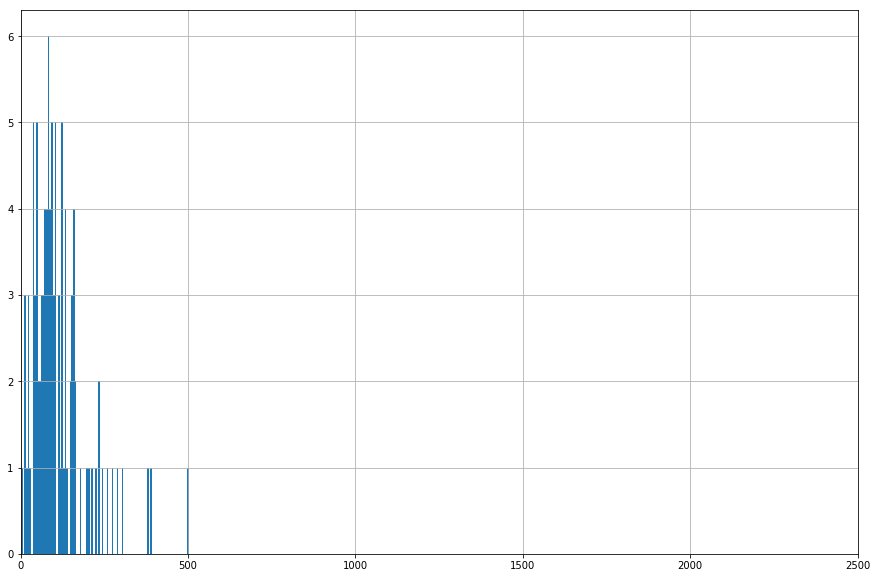

In [35]:
plt.figure(figsize=(15, 10))
plt.hist(diffs, bins=100)
plt.grid(True)
plt.xlim(0, 2500)

In [36]:
np.unique(corpus_tokens_stem).shape[0] / float(corpus_tokens_stem.shape[0])

0.9807692307692307

In [37]:
stat = {}

tmp_corp, tmp_texts = [], []

for i, tokens in enumerate(log_progress(corpus_tokens_stem)):
    s = ' '.join(tokens)
    if stat.get(s, None) is None:
        stat[s] = True
        tmp_corp.append(tokens)
        tmp_texts.append(texts[i])
        
corpus_tokens_stem = tmp_corp
texts = tmp_texts
print(len(corpus_tokens_stem), len(texts))

102 102


In [38]:

corpus_tokens_stem = np.asarray(corpus_tokens_stem)
texts = np.asarray(texts)

print(len(corpus_tokens_stem), len(texts))

102 102


In [39]:
diffs = np.asarray([len(tokens) for tokens in corpus_tokens_stem])
print(len(diffs))

102


(0, 2500)

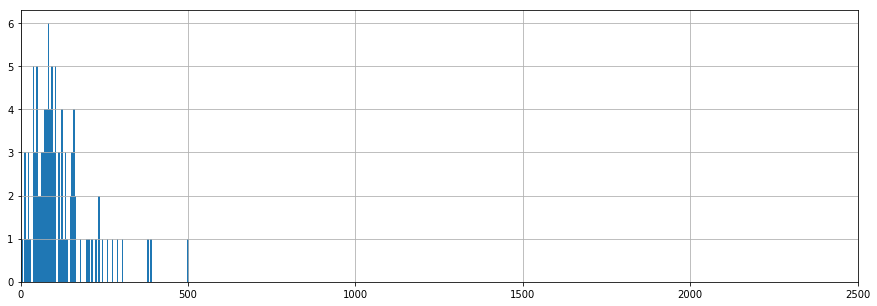

In [40]:
plt.figure(figsize=(15, 5))
plt.hist(diffs, bins=100)
plt.grid(True)
plt.xlim(0, 2500)

In [41]:
corpus_tokens_stem[diffs == 8]

array([], dtype=object)

In [42]:
corpus_tokens_stem[diffs >= 8].shape

(101,)

In [43]:
corp4learning = corpus_tokens_stem[diffs >= 8]
texts4learning = texts[diffs >= 8]

In [44]:
tmp_corp = []

for tokens in corp4learning:
    tmp_corp.append([t for t in tokens if len(t) > 2])
corp4learning = tmp_corp

In [45]:
vocab = np.unique(np.concatenate(corp4learning).flatten()).tolist()
print(len(vocab))

3806


# Лабораторная №3. Поисковик.

In [46]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [47]:
textt = ' '
for j in range(len(corpus)):
    textt+=corpus[j]
#textt+=corpus[0]
#print(textt)
textt

' госсекретарь сша майк помпео обвинил россию в политическом давлении на украину через энергетику россия использует трубопроводы для того чтобы оказывать давление политическое давление на украину – сказал помпео выступая с речью на конференции ceraweek он также заявил что россия вторглась на украину чтобы получить доступ к ее нефтяным и газовым резервам она россия решительно настроена помешать украине использовать свои энергетические резервы и использовать свои трубопроводы и сети чтобы приносить энергию в дома своих граждан – считает госсекретарь россия ранее отвергала обвинения запада во вмешательстве в дела украины и заявляла что заинтересована в разрешении внутриукраинского конфликта американист профессор факультета права высшей школы экономики вшэ александр домрин в эфире радио sputnik прокомментировал заявление госсекретаря сшаnone как отмечается за исключение набиева члены ер проголосовали единогласно на прошлой неделе в соцсетях появилось после высказывания областного депутата 

In [48]:
print (corpus[10])

президент венесуэлы николас мадуро сообщил что намерен попросить власти россии китая ирана и кубы а также оон оказать поддержу в расследовании недавней атаки на энергосистему страны которая привела к отключению на несколько дней электричества на большей части ее территории я назначил специальную комиссию по расследованию кибератаки и попросил о сотрудничестве международных экспертов я намерен попросить о поддержке оон иран китай россию и кубу сказал мадуро и добавил что у этих стран большой опыт в вопросе защиты от кибератак трансляция выступления венесуэльского лидера велась в его аккаунте в по словам мадуро спустя пять дней после общенационального отключения электричества властям удалось устранить последствия атаки которая была совершена с территории соединенных штатов могу подтвердить что победа уже в наших руках – победа в деле восстановления электросистемы венесуэлы – заверил президент главный редактор журнала латинская америка ран владимир травкин в эфире радио sputnik ответил на

In [49]:
#texts_filt = []

#dgts = ''.join(str(i) for i in range(10))
#for text in textt:
#    for s in string.punctuation + dgts:
#        text = text.replace(s, '')
#    texts_filt.append(re.sub( '\s+', ' ', text).strip())

In [50]:
texts_filt=corpus

In [51]:
corpus[1]

'none как отмечается за исключение набиева члены ер проголосовали единогласно на прошлой неделе в соцсетях появилось после высказывания областного депутата секретарь волгоградского регионального отделения единой россии сергей горняков от имени партии принес извинения за слова чиновника двенадцатого марта комиссия по этике ер рекомендовала исключить набиева из партии'

In [52]:
texts_filt

['госсекретарь сша майк помпео обвинил россию в политическом давлении на украину через энергетику россия использует трубопроводы для того чтобы оказывать давление политическое давление на украину – сказал помпео выступая с речью на конференции ceraweek он также заявил что россия вторглась на украину чтобы получить доступ к ее нефтяным и газовым резервам она россия решительно настроена помешать украине использовать свои энергетические резервы и использовать свои трубопроводы и сети чтобы приносить энергию в дома своих граждан – считает госсекретарь россия ранее отвергала обвинения запада во вмешательстве в дела украины и заявляла что заинтересована в разрешении внутриукраинского конфликта американист профессор факультета права высшей школы экономики вшэ александр домрин в эфире радио sputnik прокомментировал заявление госсекретаря сша',
 'none как отмечается за исключение набиева члены ер проголосовали единогласно на прошлой неделе в соцсетях появилось после высказывания областного депу

In [53]:
ii = {}

for i_t, text in enumerate(log_progress(texts_filt)):
    for w in text.lower().split():
        if ii.get(w, None) is None:
            ii[w] = [i_t]
        else:
            ii[w].append(i_t)
            
for w in ii.keys():
    ii[w] = np.unique(ii[w])

In [54]:
ii

{'госсекретарь': array([0, 2]),
 'сша': array([ 0,  2,  3,  8, 11, 13, 15, 16, 17, 53, 61, 64, 66, 69]),
 'майк': array([0, 2]),
 'помпео': array([0, 2]),
 'обвинил': array([0]),
 'россию': array([ 0, 10, 14, 81]),
 'в': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103]),
 'политическом': array([0]),
 'давлении': array([0]),
 'на': array([  0,   1,   3,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29

In [55]:
def search(query):
    #print(query)
    stub = range(10)
    res = [s for s in stub]
    for word in query.strip().split():
        res = np.intersect1d(res, ii.get(word, res))
    print(res)
    return [texts_filt[i] for i in res]

In [56]:
search('его и она')

[8]


['none палата представителей конгресса сша во вторник одобрила законопроект который запрещает белому дому призвать деюре или дефакто российский суверенитет над крымом а также над воздушным пространством или территориальными водами полуострова при этом в тексте содержится исключение для президента он сможет нарушить это правило если это будет отвечать интересам национальной безопасности законопроект поддержало членов палаты против проголосовал только один такое единогласное одобрение законопроекта запрещающего белому дому признавать крым частью россии является ожидаемым и в какойто части демонстрирует страх и бессилие американских властей перед собственным же народом – американцами приезжающими на полуостров и все чаще высказывающими свое восхищение крымчанами сумевшими отстоять и защитить свою родину в соответствии с международным законодательством реализовав неотъемлемое право на самоопределение сказала риа новости поклонская она также задалась вопросом что будет с одним членом палаты

# Лаба №5. tf idf

In [183]:
import os
import sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
#import enchant
from sklearn.neighbors import NearestNeighbors
import nltk
from nltk.corpus import stopwords
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [184]:
initial_categories = ['политика','экономика','проишествия','наука','культура','общество']
#eng_dict = enchant.Dict('ru_RU')
#items = enchant._broker.list_languages()

In [185]:
data_train = corpus
stopWords = set(stopwords.words('russian'))

In [186]:
vectorizer = TfidfVectorizer(stop_words=stopWords)
tfidf_train = vectorizer.fit_transform(data_train)

print (tfidf_train.shape)

(104, 7120)


In [187]:
#stopWords

In [188]:
tfidf_train

<104x7120 sparse matrix of type '<class 'numpy.float64'>'
	with 11824 stored elements in Compressed Sparse Row format>

In [189]:
valid_inds = []

for i_el, el in enumerate(tfidf_train):
    if el.getnnz() > 0:
        valid_inds.append(i_el)
        
valid_inds = np.asarray(valid_inds)
print (len(valid_inds))
        
tfidf_train_filt = tfidf_train[valid_inds]
print (tfidf_train_filt.shape)

104
(104, 7120)


In [190]:
predictor = NearestNeighbors(n_neighbors=1, algorithm='brute', metric='cosine').fit(tfidf_train_filt)

In [191]:
request = 'сколко поучают ученые'

In [192]:
tfidf_test = vectorizer.transform([vectorizer.decode(request)])

print (tfidf_test.shape)

(1, 7120)


In [193]:
tfidf_test

<1x7120 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [194]:
vectorizer.vocabulary_

{'госсекретарь': 1116,
 'сша': 6199,
 'майк': 2653,
 'помпео': 4354,
 'обвинил': 3366,
 'россию': 5396,
 'политическом': 4301,
 'давлении': 1181,
 'украину': 6490,
 'энергетику': 7042,
 'россия': 5397,
 'использует': 2073,
 'трубопроводы': 6392,
 'оказывать': 3574,
 'давление': 1180,
 'политическое': 4299,
 'сказал': 5655,
 'выступая': 948,
 'речью': 5325,
 'конференции': 2363,
 'ceraweek': 15,
 'также': 6215,
 'заявил': 1781,
 'вторглась': 844,
 'получить': 4334,
 'доступ': 1457,
 'нефтяным': 3281,
 'газовым': 992,
 'резервам': 5284,
 'решительно': 5334,
 'настроена': 3099,
 'помешать': 4346,
 'украине': 6482,
 'использовать': 2070,
 'свои': 5519,
 'энергетические': 7043,
 'резервы': 5287,
 'сети': 5615,
 'приносить': 4740,
 'энергию': 7047,
 'дома': 1409,
 'своих': 5521,
 'граждан': 1137,
 'считает': 6190,
 'ранее': 5175,
 'отвергала': 3746,
 'обвинения': 3365,
 'запада': 1702,
 'вмешательстве': 659,
 'дела': 1257,
 'украины': 6492,
 'заявляла': 1791,
 'заинтересована': 1631,
 'разре

In [195]:
print (tfidf_test[0])

  (0, 6636)	1.0


In [198]:
distances, inds_pred = predictor.kneighbors(tfidf_test, n_neighbors=10)

In [199]:
distances = np.squeeze(distances)
inds_pred = np.squeeze(inds_pred)

In [200]:
for i, item in enumerate(np.asarray(corpus)[valid_inds[inds_pred]], start=1):
    if i<10:
        print ('--------------------------- Top-{} ---------------------------'.format(i))
        print (item)
        print ('---------------------------- end -----------------------------')
        print

--------------------------- Top-1 ---------------------------
none в последние годы ученые начали активно обсуждать гипотезу панспермии – идею того что жизнь на землю или другие планеты могла быть занесена из космоса она была придумана в году известным шведским химиком сванте аррениусом однако до недавнего времени ее никто не рассматривал всерьез ситуация несколько поменялась после экспериментов на борту российских биоспутников серии бионм на практике доказавших возможность выживания микробов при падении метеорита на землю кроме того американские ученые показали что окаменелые останки земной жизни могли быть выбиты с поверхности земли астероидами и быть выброшены в космос откуда они могли попадать в прошлом на луну марс и другие планеты подобные опыты а также открытие следов потенциально обитаемых озер на марсе заставляют ученых задуматься о том в каких условиях могут жить внеземные живые существа и что нужно для их выживания одними из кандидатов на роль подобных инопланетян считаются 

# Лабораторная №4. Классификатор.

In [76]:
import os
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
#import enchant
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import re
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
import itertools
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

%matplotlib inline

In [77]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

### Prepare The Data

In [78]:
print (vectorizer)
print (initial_categories)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words={'свою', 'вот', 'до', 'ли', 'была', 'к', 'мне', 'только', 'тогда', 'эту', 'здесь', 'ней', 'ним', 'через', 'все', 'мы', 'теперь', 'или', 'всегда', 'больше', 'про', 'при', 'где', 'моя', 'а', 'кто', 'за', 'после', 'от', 'том', 'тоже', 'три', 'этой', 'я', 'тот', 'как', 'лучше', 'под', 'куда',..., 'чтоб', 'вдруг', 'без', 'будто', 'этом', 'нее', 'всего', 'ничего', 'он', 'совсем', 'если', 'было'},
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)
['политика', 'экономика', 'проишествия', 'наука', 'культура', 'общество']


In [79]:
#data_train = corpus
#y_train = corpus_cat
data_train = []
y_train = []
data_test = []
y_test = []
   
y_train = np.asarray(y_train)
    
print (len(data_train), len(y_train))

0 0


In [83]:
import random
def splitTrainTest (data, index, testPercent):
    trainData  = []
    trainIndex = []
    testData   = []
    testIndex  = []
    for text,i in zip(data,index):
        if random.random()*100 < testPercent:
            testData.append(text)
            testIndex.append(i)
        else:
            trainData.append(text)
            trainIndex.append(i)
    return trainData, trainIndex, testData, testIndex

In [84]:
data_train, y_train, data_test, y_test = splitTrainTest(corpus, corpus_cat, 35)

y_test

In [85]:
print (len(data_train), len(y_train))

71 71


In [86]:
print (len(data_test), len(y_test))

33 33


In [87]:
X_train = vectorizer.fit_transform(data_train)
X_test = vectorizer.transform(data_test)

print (X_train.shape, X_test.shape)

(71, 5361) (33, 5361)


In [88]:
X_train

<71x5361 sparse matrix of type '<class 'numpy.float64'>'
	with 8114 stored elements in Compressed Sparse Row format>

## Build Models

* **Logistic Regression**
* **SVM**
* **Random Forest**
* **Gradient Boosting Trees**

**Define classifiers:**

In [89]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [90]:
predictor_lr = LogisticRegression().fit(X_train, y_train)

In [91]:
predictor_svm = LinearSVC().fit(X_train, y_train)

In [92]:
predictor_rf = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)

In [93]:
predictor_gbt = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)

**Evaluate Classifiers:**

In [94]:
y_pred_lr = predictor_lr.predict(X_test)
print ('LR accuracy: {}%'.format(round(np.mean(y_test == y_pred_lr), 2)))

LR accuracy: 0.39%


In [95]:
y_pred_svm = predictor_svm.predict(X_test)
print ('LR accuracy: {}%'.format(round(np.mean(y_test == y_pred_svm), 2)))

LR accuracy: 0.52%


In [96]:
y_pred_rf = predictor_rf.predict(X_test)
print ('RF accuracy: {}%'.format(round(np.mean(y_test == y_pred_rf), 2)))

RF accuracy: 0.33%


In [97]:
y_pred_gbt = predictor_gbt.predict(X_test)
print ('GBT accuracy: {}%'.format(round(np.mean(y_test == y_pred_gbt), 2)))

GBT accuracy: 0.27%


### [Confusion Matrices](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)


In [98]:
def plot_confusion_matrix(cm, title='Contingency matrix'):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[0])
    classes = [x.split('.')[-1] for x in initial_categories]
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)

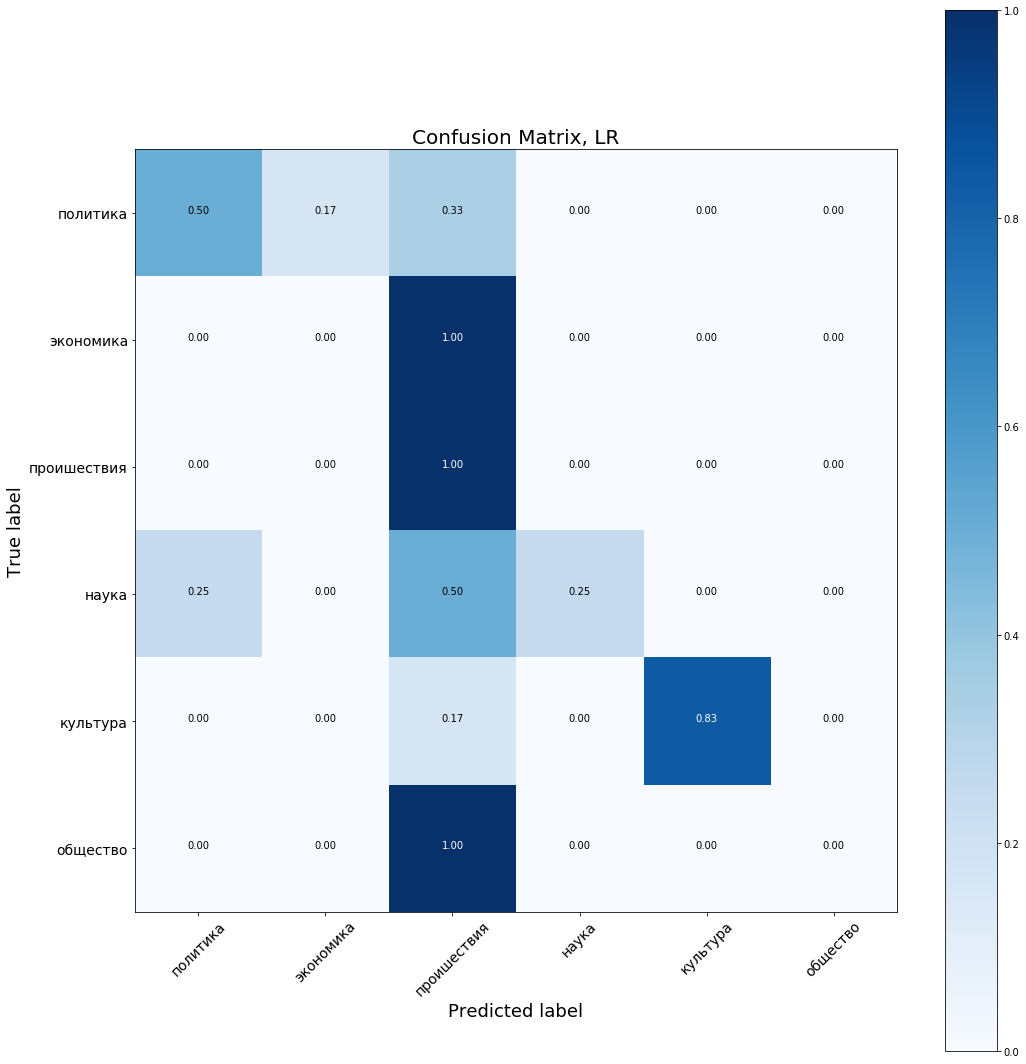

In [99]:
cmt_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cmt_lr, title='Confusion Matrix, LR')

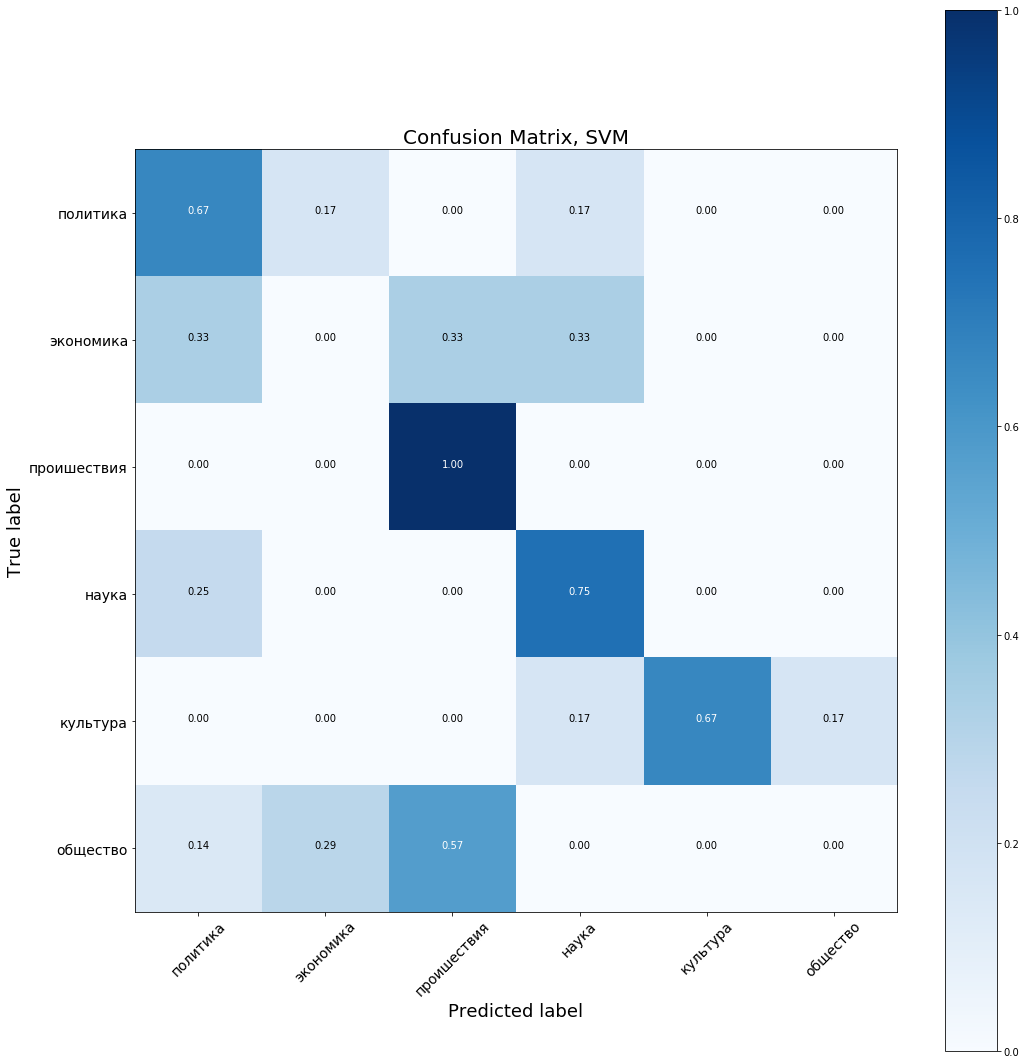

In [100]:
cmt_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cmt_svm, title='Confusion Matrix, SVM')

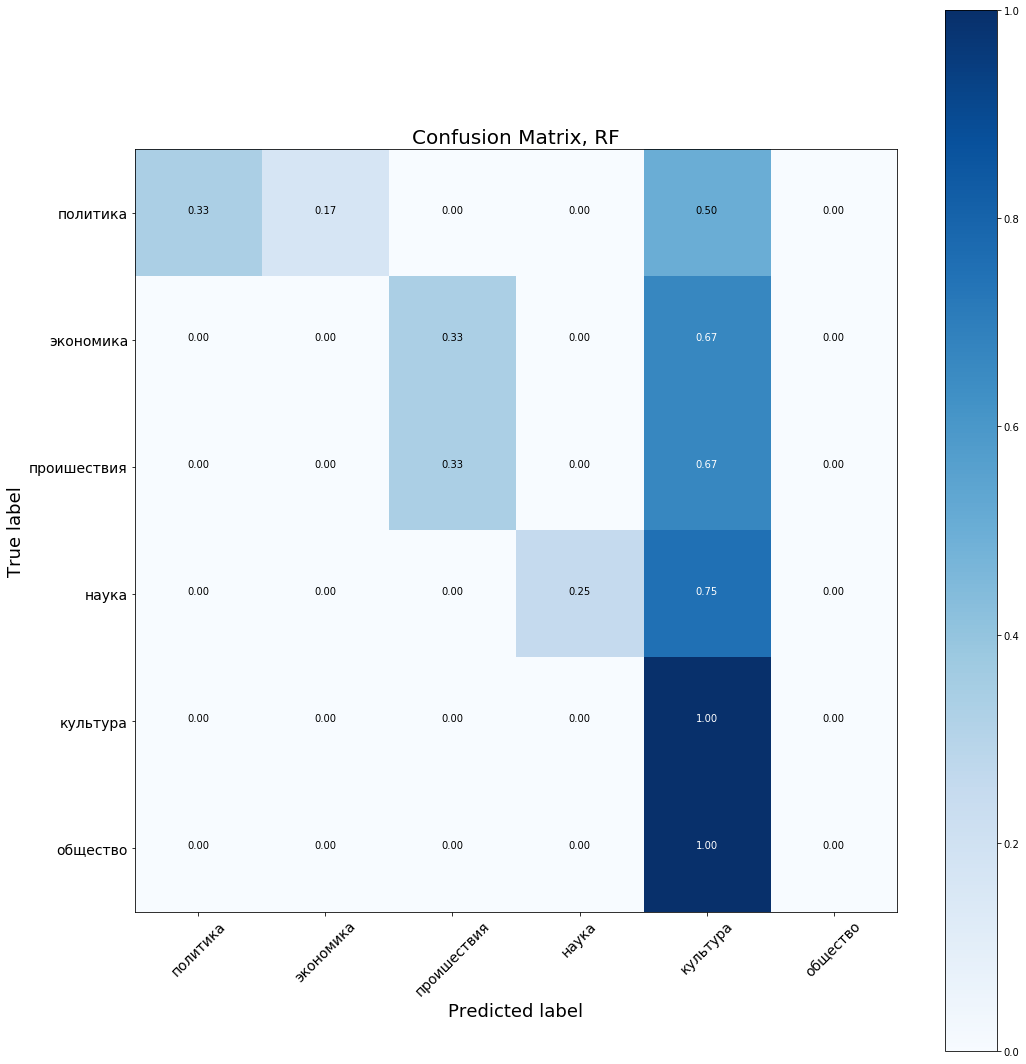

In [101]:
cmt_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cmt_rf, title='Confusion Matrix, RF')

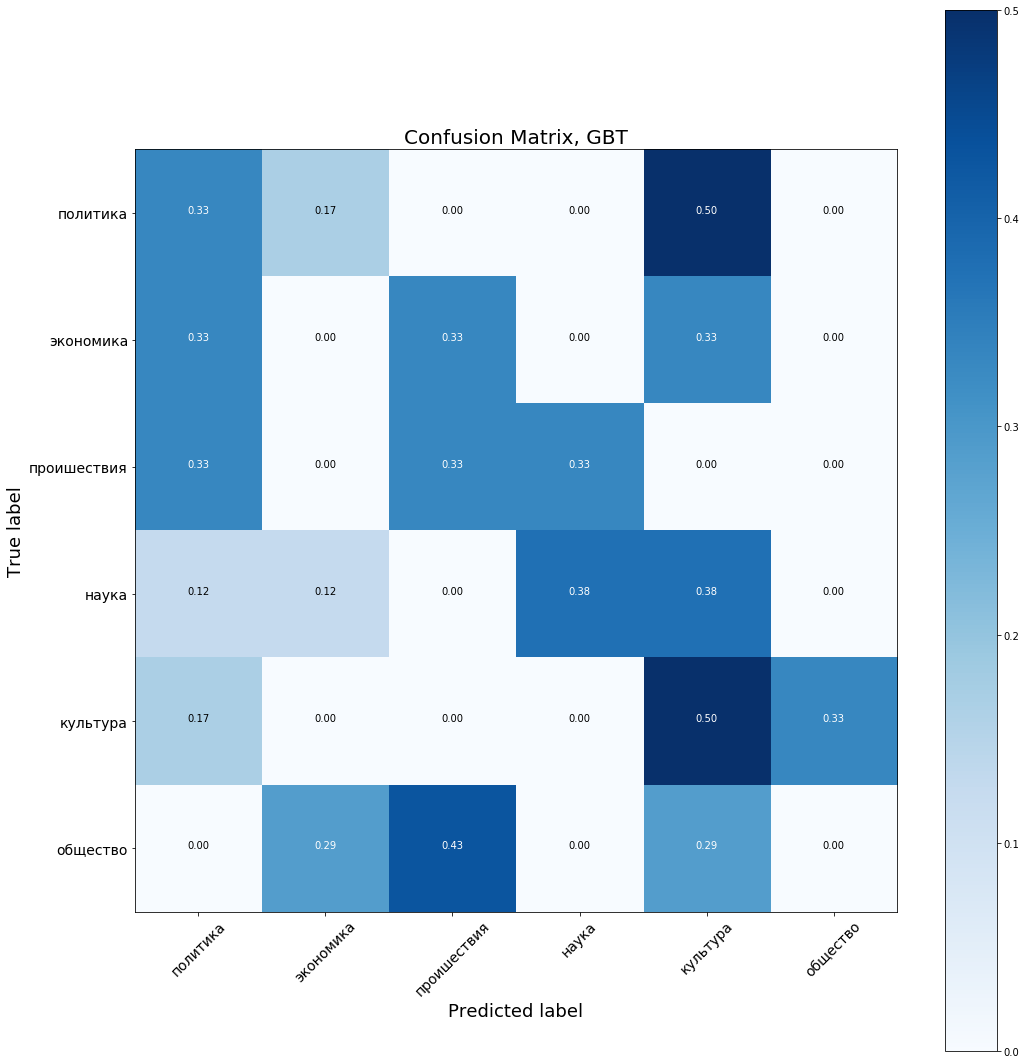

In [102]:
cmt_gbt = confusion_matrix(y_test, y_pred_gbt)
plot_confusion_matrix(cmt_gbt, title='Confusion Matrix, GBT')

### Feature Importances:

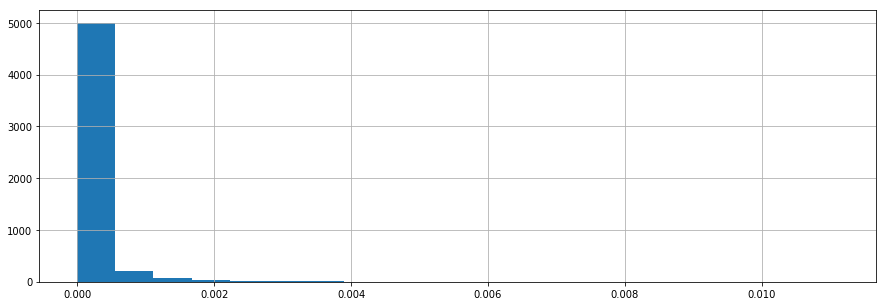

In [103]:
plt.figure(figsize=(15, 5))

plt.hist(predictor_rf.feature_importances_, bins=20)
plt.grid(True)

(0, 0.001)

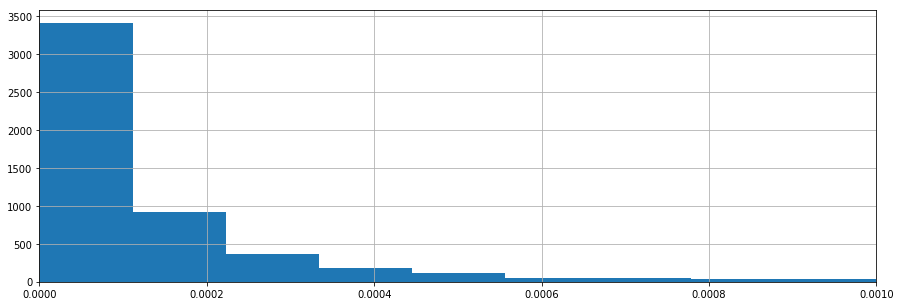

In [104]:
plt.figure(figsize=(15, 5))

plt.hist(predictor_rf.feature_importances_, bins=100)
plt.grid(True)
plt.xlim(0, 0.001)

**Create feature selector:**

In [105]:
feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=10)).fit(X_train, y_train)

In [106]:
X_train_transformed = feature_selector.transform(X_train)
X_test_transformed = feature_selector.transform(X_test)

print (X_train_transformed.shape, X_test_transformed.shape)

(71, 255) (33, 255)


**Train and evaluate the new classifier:**

In [107]:
predictor_lr_ = LogisticRegression().fit(X_train_transformed, y_train)

In [108]:
y_pred_lr_ = predictor_lr_.predict(X_test_transformed)
print ('LR (with feature selection) accuracy: {}%'.format(round(np.mean(y_test == y_pred_lr_), 2)))

LR (with feature selection) accuracy: 0.12%


### Binary Classification

In [109]:
predictor_oneVSall = OneVsRestClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train)

In [110]:
y_pred_onevsall = predictor_oneVSall.predict(X_test)
print ('One-VS-all accuracy: {}%'.format(round(np.mean(y_test == y_pred_onevsall), 2)))

One-VS-all accuracy: 0.52%


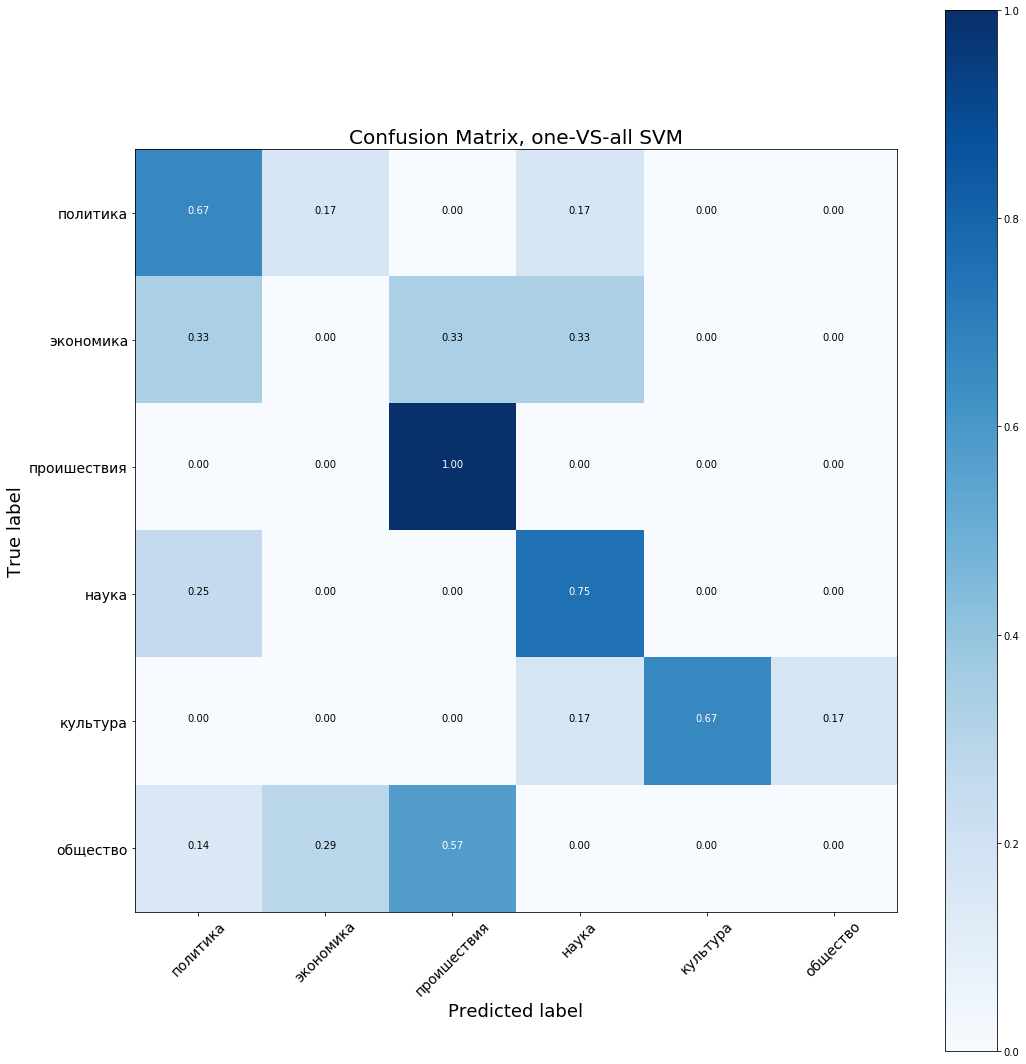

In [111]:
cmt_svm_onevsall = confusion_matrix(y_test, y_pred_onevsall)
plot_confusion_matrix(cmt_svm_onevsall, title='Confusion Matrix, one-VS-all SVM')

In [112]:
predictor_oneVSone = OneVsOneClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train)

In [113]:
y_pred_onevsone = predictor_oneVSone.predict(X_test)
print ('One-VS-one accuracy: {}%'.format(round(np.mean(y_test == y_pred_onevsone), 2)))

One-VS-one accuracy: 0.48%


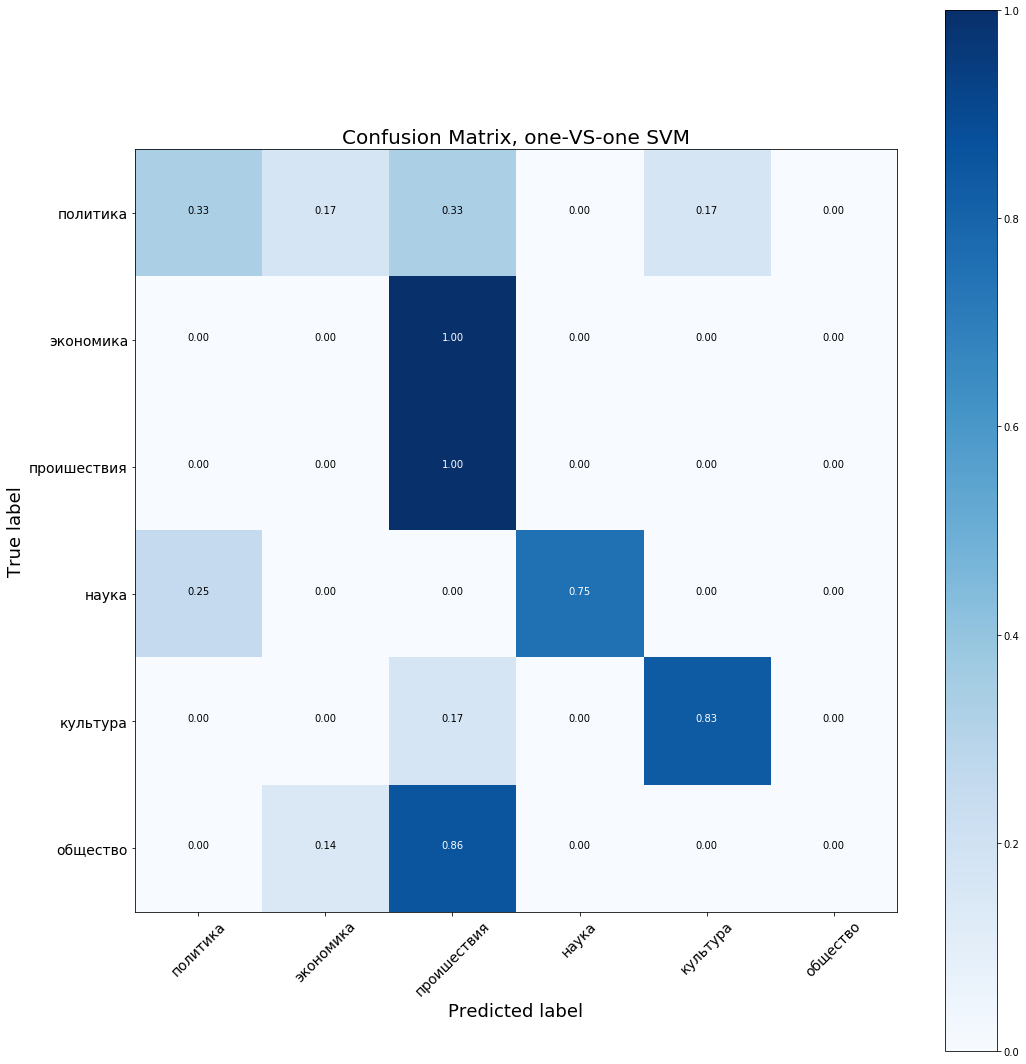

In [114]:
cmt_svm_onevsone = confusion_matrix(y_test, y_pred_onevsone)
plot_confusion_matrix(cmt_svm_onevsone, title='Confusion Matrix, one-VS-one SVM')

In [115]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
for c in np.unique(y_train):
    print ('Class \'{}\' samples N: {}'.format(c, y_train[y_train == c].shape[0]))

Class '0' samples N: 14
Class '1' samples N: 9
Class '2' samples N: 17
Class '3' samples N: 12
Class '4' samples N: 14
Class '5' samples N: 5


In [116]:
X_train_bin = X_train[(y_train == 2) | (y_train == 4)]
y_train_bin = y_train[(y_train == 2) | (y_train == 4)]

y_train_bin[y_train_bin == 2] = 0
y_train_bin[y_train_bin == 4] = 1

print (X_train_bin.shape, y_train_bin.shape)

(31, 5361) (31,)


In [117]:
X_test_bin = X_test[(y_test == 2) | (y_test == 4)]
y_test_bin = y_test[(y_test == 2) | (y_test == 4)]

y_test_bin[y_test_bin == 2] = 0
y_test_bin[y_test_bin == 4] = 1

print (X_test_bin.shape, y_test_bin.shape)

(9, 5361) (9,)


In [118]:
one_binary_predictor = RandomForestClassifier(n_estimators=100).fit(X_train_bin, y_train_bin)

### [Metrics](https://en.wikipedia.org/wiki/Precision_and_recall)

In [119]:
y_pred_binary = one_binary_predictor.predict(X_test_bin)

print ('Binary classifiers accuracy: {}%'.format(round(np.mean(y_pred_binary == y_test_bin), 2)))

Binary classifiers accuracy: 0.89%


In [120]:
def FP(y_true, y_pred):
    return float(np.sum(y_true[y_true == 0] != y_pred[y_true == 0]))

In [121]:
def TP(y_true, y_pred):
    return float(np.sum(y_true[y_true == 1] == y_pred[y_true == 1]))

In [122]:
def FN(y_true, y_pred):
    return float(np.sum(y_true[y_true == 1] != y_pred[y_true == 1]))

In [123]:
def TN(y_true, y_pred):
    return float(np.sum(y_true[y_true == 0] == y_pred[y_true == 0]))

In [124]:
fp = FP(y_test_bin, y_pred_binary)
fn = FN(y_test_bin, y_pred_binary)
tp = TP(y_test_bin, y_pred_binary)
tn = TN(y_test_bin, y_pred_binary)

print ('TP = {}, FP = {}, TN = {}, FN = {}\n---------------------------------------------\nsum = {}'.format(tp, fp, tn, fn, tp + fp + tn + fn))

TP = 6.0, FP = 1.0, TN = 2.0, FN = 0.0
---------------------------------------------
sum = 9.0


In [125]:
P = precision_score(y_test_bin, y_pred_binary)
R = recall_score(y_test_bin, y_pred_binary)

print ('Precision: {}, Recall: {}'.format(P, R))

Precision: 0.8571428571428571, Recall: 1.0


In [126]:
print (tp / (tp + fp), tp / (tp + fn))

0.8571428571428571 1.0


In [127]:
print ('F1: {}'.format(f1_score(y_test_bin, y_pred_binary)))

F1: 0.923076923076923


In [128]:
print (2.0 * P * R / (P + R))

0.923076923076923


In [129]:
scores_binary = one_binary_predictor.predict_proba(X_test_bin)[:, 1]

print (scores_binary.shape)

(9,)


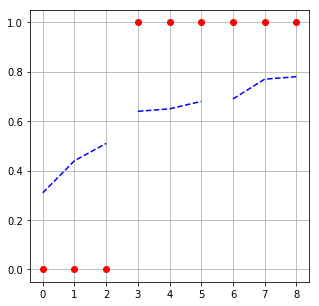

In [130]:
plt.figure(figsize=(5, 5))

N_batch = 3
inds = np.argsort(scores_binary)
scores_sorted = scores_binary[inds]
y_sorted = y_test_bin[inds]
q = len(y_test_bin) // N_batch

for i in range(N_batch):
    plt.plot(range(q * i, q * (i + 1)), scores_sorted[q * i : q * (i + 1)], '--b')
    plt.plot(range(q * i, q * (i + 1)), [np.mean(y_sorted[q * i : q * (i + 1)])] * q, 'ro')
    
plt.grid(True)

In [131]:
fpr, tpr, thresholds = roc_curve(y_test_bin, scores_binary)

(-0.1, 1.1)

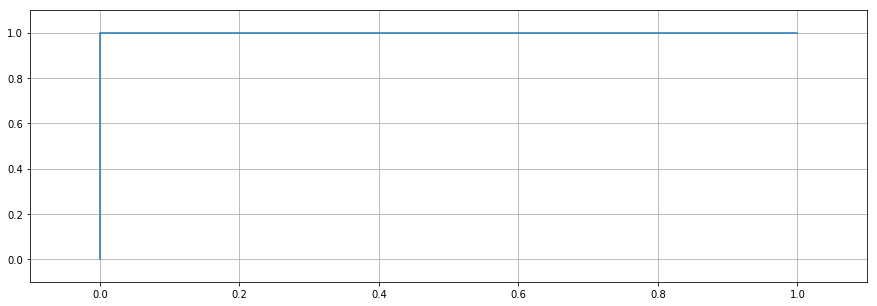

In [132]:
plt.figure(figsize=(15, 5))

inds = np.argsort(fpr)
plt.plot(fpr[inds], tpr[inds])
plt.grid(True)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

In [133]:
roc_auc = roc_auc_score(y_test_bin, scores_binary)

print ('AUC score: {}'.format(roc_auc, 2))

AUC score: 1.0


In [134]:
f1_max = 0
y_pred_best = None

for thr in thresholds:
    y_pred_tuned = scores_binary.copy()
    y_pred_tuned[y_pred_tuned < thr] = 0
    y_pred_tuned[y_pred_tuned >= thr] = 1
    
    f1 = f1_score(y_test_bin, y_pred_tuned)
    if f1 > f1_max:
        f1_max = f1
        y_pred_best = y_pred_tuned
    if f1 > 0.894308943089:
        print ('thr = {}: F1 +{}'.format(thr, round(f1 - 0.8920570264765784, 4)))
        
print ()
print ('Max. F1: {}'.format(round(f1_max, 3)))

thr = 0.64: F1 +0.1079

Max. F1: 1.0


C:\Users\sweetheart\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [135]:
print (np.mean(y_test_bin == y_pred_best))

1.0


## Ensembling

In [136]:
print (np.mean(RandomForestClassifier(n_estimators=10).fit(X_train, y_train).predict(X_test) == y_test))
print (np.mean(RandomForestClassifier(n_estimators=100, criterion='entropy').fit(X_train, y_train).predict(X_test) == y_test))
print (np.mean(GradientBoostingClassifier(n_estimators=10).fit(X_train, y_train).predict(X_test) == y_test))

0.42424242424242425
0.3939393939393939
0.3333333333333333


In [137]:
ensemble_soft = VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='soft', n_jobs=1)

ensemble_hard = VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='hard', n_jobs=1)

In [138]:
ensemble_soft.fit(X_train, y_train)
ensemble_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('rf_gini_10', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
          ...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [139]:
y_pred_hard = ensemble_hard.predict(X_test)
y_pred_soft = ensemble_soft.predict(X_test)

print (y_pred_hard.shape, y_pred_soft.shape)

(33,) (33,)


In [140]:
print ('Hard voting accuracy: {}%'.format(round(np.mean(y_test == y_pred_hard), 2)))
print ('Soft voting accuracy: {}%'.format(round(np.mean(y_test == y_pred_soft), 2)))

Hard voting accuracy: 0.33%
Soft voting accuracy: 0.36%
